<a href="https://colab.research.google.com/github/lisianshehu/SolarEnergyPrediction/blob/main/SolarEnergy_w_LSTM_%26_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solar Energy Prediction with LSTM and Monte Carlo Dropout

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tqdm import tqdm 
from sklearn.metrics import accuracy_score

mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False

# Read in the data

In [ ]:
# read in data(generation data will only be used in this case)

df = pd.read_csv('Plant_1_Generation_Data.csv')
df2 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
display(df)
display(df2)

DATE_TIME  PLANT_ID  ... DAILY_YIELD  TOTAL_YIELD
0      15-05-2020 00:00   4135001  ...       0.000    6259559.0
1      15-05-2020 00:00   4135001  ...       0.000    6183645.0
2      15-05-2020 00:00   4135001  ...       0.000    6987759.0
3      15-05-2020 00:00   4135001  ...       0.000    7602960.0
4      15-05-2020 00:00   4135001  ...       0.000    7158964.0
...                 ...       ...  ...         ...          ...
68773  17-06-2020 23:45   4135001  ...    5967.000    7287002.0
68774  17-06-2020 23:45   4135001  ...    5147.625    7028601.0
68775  17-06-2020 23:45   4135001  ...    5819.000    7251204.0
68776  17-06-2020 23:45   4135001  ...    5817.000    6583369.0
68777  17-06-2020 23:45   4135001  ...    5910.000    7363272.0

[68778 rows x 7 columns]

DATE_TIME  PLANT_ID  ... MODULE_TEMPERATURE  IRRADIATION
0     2020-05-15 00:00:00   4135001  ...          22.857507          0.0
1     2020-05-15 00:15:00   4135001  ...          22.761668          0.0
2     2020-05-15 00:30:00   4135001  ...          22.592306          0.0
3     2020-05-15 00:45:00   4135001  ...          22.360852          0.0
4     2020-05-15 01:00:00   4135001  ...          22.165423          0.0
...                   ...       ...  ...                ...          ...
3177  2020-06-17 22:45:00   4135001  ...          21.480377          0.0
3178  2020-06-17 23:00:00   4135001  ...          21.389024          0.0
3179  2020-06-17 23:15:00   4135001  ...          20.709211          0.0
3180  2020-06-17 23:30:00   4135001  ...          20.734963          0.0
3181  2020-06-17 23:45:00   4135001  ...          20.427972          0.0

[3182 rows x 6 columns]

# Visualize and Preprocessing

In [ ]:
df.SOURCE_KEY.drop_duplicates()
display(df[:50])
# Get the source key of each inverter

DATE_TIME  PLANT_ID  ... DAILY_YIELD  TOTAL_YIELD
0   15-05-2020 00:00   4135001  ...         0.0    6259559.0
1   15-05-2020 00:00   4135001  ...         0.0    6183645.0
2   15-05-2020 00:00   4135001  ...         0.0    6987759.0
3   15-05-2020 00:00   4135001  ...         0.0    7602960.0
4   15-05-2020 00:00   4135001  ...         0.0    7158964.0
5   15-05-2020 00:00   4135001  ...         0.0    7206408.0
6   15-05-2020 00:00   4135001  ...         0.0    7028673.0
7   15-05-2020 00:00   4135001  ...         0.0    6522172.0
8   15-05-2020 00:00   4135001  ...         0.0    7098099.0
9   15-05-2020 00:00   4135001  ...         0.0    6271355.0
10  15-05-2020 00:00   4135001  ...         0.0    6316803.0
11  15-05-2020 00:00   4135001  ...         0.0    7177992.0
12  15-05-2020 00:00   4135001  ...         0.0    6185184.0
13  15-05-2020 00:00   4135001  ...         0.0    7169102.0
14  15-05-2020 00:00   4135001  ...         0.0    7111493.0
15  15-05-2020 00:00   4135001  ...         0.0    7016832.0
16  15-05-2020 00:00   4135001  ...         0.0    7038681.0
17  15-05-2020 00:00   4135001  ...         0.0    6782598.0
18  15-05-2020 00:00   4135001  ...         0.0    7007866.0
19  15-05-2020 00:00   4135001  ...         0.0    6339380.0
20  15-05-2020 00:00   4135001  ...         0.0    7116151.0
21  15-05-2020 00:15   4135001  ...         0.0    6259559.0
22  15-05-2020 00:15   4135001  ...         0.0    6183645.0
23  15-05-2020 00:15   4135001  ...         0.0    6987759.0
24  15-05-2020 00:15   4135001  ...         0.0    7602960.0
25  15-05-2020 00:15   4135001  ...         0.0    7158964.0
26  15-05-2020 00:15   4135001  ...         0.0    7206408.0
27  15-05-2020 00:15   4135001  ...         0.0    7028673.0
28  15-05-2020 00:15   4135001  ...         0.0    6522172.0
29  15-05-2020 00:15   4135001  ...         0.0    7098099.0
30  15-05-2020 00:15   4135001  ...         0.0    6271355.0
31  15-05-2020 00:15   4135001  ...         0.0    6316803.0
32  15-05-2020 00:15   4135001  ...         0.0    7177992.0
33  15-05-2020 00:15   4135001  ...         0.0    6185184.0
34  15-05-2020 00:15   4135001  ...         0.0    7169102.0
35  15-05-2020 00:15   4135001  ...         0.0    7111493.0
36  15-05-2020 00:15   4135001  ...         0.0    7016832.0
37  15-05-2020 00:15   4135001  ...         0.0    7038681.0
38  15-05-2020 00:15   4135001  ...         0.0    6782598.0
39  15-05-2020 00:15   4135001  ...         0.0    7007866.0
40  15-05-2020 00:15   4135001  ...         0.0    6339380.0
41  15-05-2020 00:15   4135001  ...         0.0    7116151.0
42  15-05-2020 00:30   4135001  ...         0.0    6259559.0
43  15-05-2020 00:30   4135001  ...         0.0    6183645.0
44  15-05-2020 00:30   4135001  ...         0.0    6987759.0
45  15-05-2020 00:30   4135001  ...         0.0    7602960.0
46  15-05-2020 00:30   4135001  ...         0.0    7158964.0
47  15-05-2020 00:30   4135001  ...         0.0    7206408.0
48  15-05-2020 00:30   4135001  ...         0.0    7028673.0
49  15-05-2020 00:30   4135001  ...         0.0    6522172.0

[50 rows x 7 columns]

In [ ]:
# Cleaning datasheet, some naming issue
part1 = pd.DataFrame(df[0:33111])
part2 = df[33112:58262]
part3 = df[58263:68778]

# Format time from inconsistency
part1 =part1.assign(DATE_TIME = pd.to_datetime(part1.DATE_TIME))
part2 =part2.assign(DATE_TIME = pd.to_datetime(part2.DATE_TIME,dayfirst=True))
part3 =part3.assign(DATE_TIME = pd.to_datetime(part3.DATE_TIME))

data = pd.concat([part1,part2,part3])

# aggregate data from inverters at each interval 
power = data.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum')
sensor = df2.assign(DATE_TIME = pd.to_datetime(df2.DATE_TIME))
combine = pd.merge(power,sensor, on="DATE_TIME")
combine

DATE_TIME  DC_POWER  ...  MODULE_TEMPERATURE  IRRADIATION
0    2020-05-15 00:00:00       0.0  ...           22.857507          0.0
1    2020-05-15 00:15:00       0.0  ...           22.761668          0.0
2    2020-05-15 00:30:00       0.0  ...           22.592306          0.0
3    2020-05-15 00:45:00       0.0  ...           22.360852          0.0
4    2020-05-15 01:00:00       0.0  ...           22.165423          0.0
...                  ...       ...  ...                 ...          ...
3152 2020-06-17 22:45:00       0.0  ...           21.480377          0.0
3153 2020-06-17 23:00:00       0.0  ...           21.389024          0.0
3154 2020-06-17 23:15:00       0.0  ...           20.709211          0.0
3155 2020-06-17 23:30:00       0.0  ...           20.734963          0.0
3156 2020-06-17 23:45:00       0.0  ...           20.427972          0.0

[3157 rows x 10 columns]

In [ ]:
# splitting data into train, validation and test

TRAIN_SPLIT = int(len(combine)*.6)
VAL_SPLIT = int(len(combine)*0.2)
TEST_SPLIT = int(len(combine)*0.2)
print(TRAIN_SPLIT, VAL_SPLIT, TEST_SPLIT)

1894 631 631


In [ ]:
tf.random.set_seed(47)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ba8f17550>],
      dtype=object)

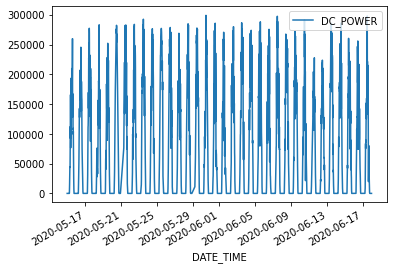

In [ ]:
# feature engineering(in this case we only care about the DC power)

features_considered = ['DC_POWER']
features = combine[features_considered]
features.index = combine['DATE_TIME']
features.plot(subplots=True)

In [ ]:
# normalize dataset

features_dataset = features.values
data_mean = features_dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = features_dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (features_dataset-data_mean)/data_std
print(len(dataset))
dataset.shape

3157


(3157, 1)

In [ ]:
# used to window the data in consecutive time steps for predictions 
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
past_history = 288
future_target = 96
STEP = 4

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 0], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 0],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
# get windows of data for 3 day history time with 24 hour future target
# the data is split into training, validation and test Tensors containing the inputs and labels of each 

BATCH_SIZE = 256
BUFFER_SIZE = 10000
future_target = 96
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)

x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:],
                                             TRAIN_SPLIT, (VAL_SPLIT+TRAIN_SPLIT), past_history,
                                             future_target, STEP)

x_test_multi, y_test_multi = multivariate_data(dataset, dataset[:], (TRAIN_SPLIT+VAL_SPLIT), 
                                              None, 
                                              past_history, future_target, STEP)

print('Training window of past history : {}'.format(x_train_multi[0].shape))
print('Training target generation to predict : {}\n'.format(y_train_multi[0].shape))
print('Validation window of past history : {}'.format(x_val_multi[0].shape))
print('Validation target generation to predict : {}\n'.format(y_val_multi[0].shape))
print('Test window of past history: {}'.format(x_test_multi[0].shape))
print('Test target generation to predict: {}\n'.format(y_test_multi[0].shape))

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

test_data_multi = tf.data.Dataset.from_tensor_slices((x_test_multi, y_test_multi))
test_data_multi = test_data_multi.batch(BATCH_SIZE).repeat()

print(train_data_multi)
print(val_data_multi)
print(test_data_multi)



Training window of past history : (72, 1)
Training target generation to predict : (96, 1)

Validation window of past history : (72, 1)
Validation target generation to predict : (96, 1)

Test window of past history: (72, 1)
Test target generation to predict: (96, 1)

<RepeatDataset shapes: ((None, 72, 1), (None, 96, 1)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 72, 1), (None, 96, 1)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 72, 1), (None, 96, 1)), types: (tf.float64, tf.float64)>


In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
# function used to plot the history, true future and predicted future by 4 step intervals

def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bx',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

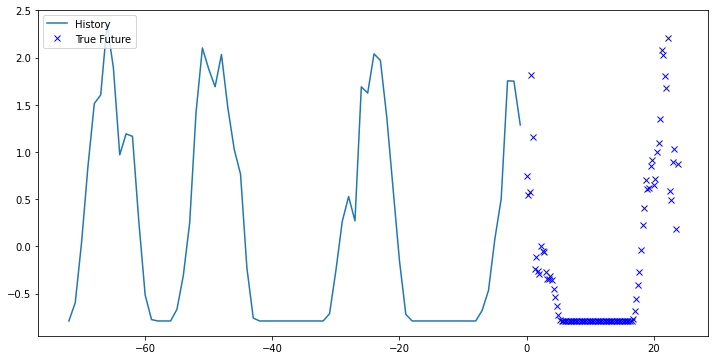

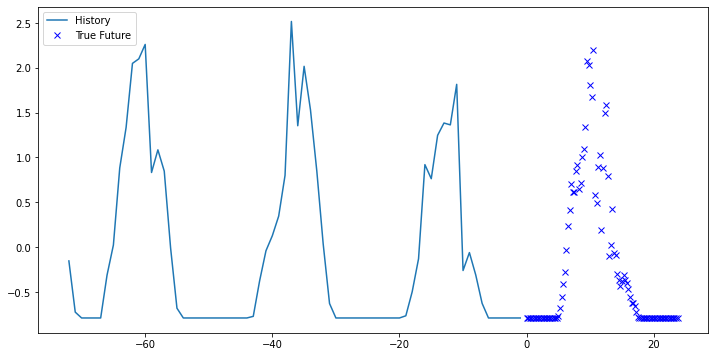

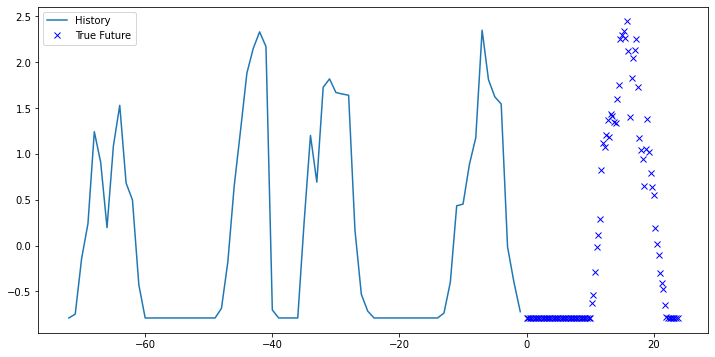

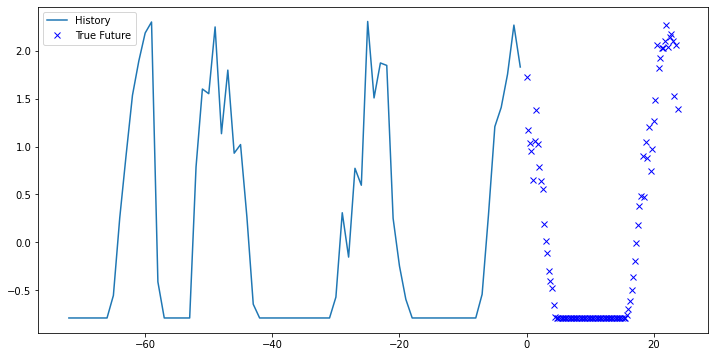

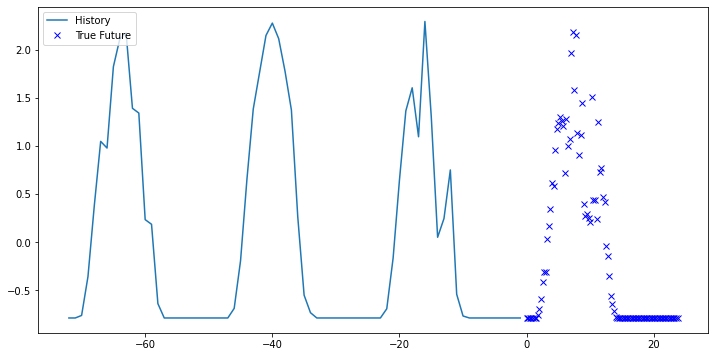

In [ ]:
# plot the training data history and futures
# this will shuffle through a set of batches of input data and labels generated 
# therefore will produce different plot each time it is run

for x, y in train_data_multi.take(5):
    multi_step_plot(x[0], y[0], np.array([0]))

# Create the model with LSTM and Monte Carlo Dropout

In [ ]:
# create sequential model with LSTM layer, Dropout Layer and Dense layer 
# compile the model using RMSprop optimizer and various loss functions

multi_step_solar_model = tf.keras.models.Sequential()
multi_step_solar_model.add(tf.keras.layers.LSTM(16,
                                          return_sequences=False,
                                          input_shape=x_train_multi.shape[-2:], recurrent_dropout=0.35))
multi_step_solar_model.add(tf.keras.layers.Dropout(0.35))
multi_step_solar_model.add(tf.keras.layers.Dense(96))


multi_step_solar_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
multi_step_solar_model


In [ ]:
# verify the shape of a prediciton on the training data generates an array of correction dimensiona and size

for x, y in train_data_multi.take(1):
  print(multi_step_solar_model.predict(x).shape)

(256, 96)


## Fit the model

In [ ]:
# fit the model using training tensor and validation use validation tensor
# 10 epochs for training and validation with 200 steps and 100 steps each epoch respectively

EPOCHS = 10
EVALUATION_INTERVAL = 200


multi_step_solar_history = multi_step_solar_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=100)


Epoch 1/10
200/200 [==============================] - 14s 70ms/step - loss: 0.6800 - val_loss: 0.3852
Epoch 2/10
200/200 [==============================] - 14s 69ms/step - loss: 0.5189 - val_loss: 0.2584
Epoch 3/10
200/200 [==============================] - 14s 69ms/step - loss: 0.4691 - val_loss: 0.2305
Epoch 4/10
200/200 [==============================] - 14s 69ms/step - loss: 0.4563 - val_loss: 0.2276
Epoch 5/10
200/200 [==============================] - 14s 69ms/step - loss: 0.4488 - val_loss: 0.2249
Epoch 6/10
200/200 [==============================] - 14s 71ms/step - loss: 0.4440 - val_loss: 0.2223
Epoch 7/10
200/200 [==============================] - 14s 69ms/step - loss: 0.4390 - val_loss: 0.2193
Epoch 8/10
200/200 [==============================] - 14s 69ms/step - loss: 0.4352 - val_loss: 0.2189
Epoch 9/10
200/200 [==============================] - 14s 69ms/step - loss: 0.4327 - val_loss: 0.2252
Epoch 10/10
200/200 [==============================] - 14s 69ms/step - loss: 0.429

## Generate predictions with accuracy metrics and visualizations

In [ ]:
# generate 100 predictions and keep track of them through mc_predictions list

mc_predictions = []
for i in tqdm(range(100)):
    for x, y in test_data_multi.take(1):
      y_predict = multi_step_solar_model.predict(x)
      mc_predictions.append(y_predict)

print(np.array(mc_predictions).shape)


100%|██████████| 100/100 [00:08<00:00, 11.67it/s]

(100, 248, 96)


100 scores for predicted vs true values:
 [0.87078853 0.86335394 0.86274355 0.85795469 0.86311331 0.86093315
 0.86270467 0.86597502 0.86418075 0.85580509 0.87581304 0.88159673
 0.88429908 0.8722753  0.87608283 0.86780822 0.87117512 0.85812318
 0.8523099  0.86403979 0.87160121 0.85551992 0.84761518 0.84949904
 0.86496956 0.86345758 0.85927345 0.8566281  0.86664828 0.86337068
 0.84900268 0.8535402  0.86167491 0.86587937 0.86497217 0.86576712
 0.87248349 0.87451817 0.87466932 0.87450378 0.87360572 0.87006366
 0.86673327 0.86205717 0.85924062 0.85590684 0.85205845 0.85088245
 0.85435773 0.85866592 0.85863454 0.85985805 0.86501765 0.86458476
 0.85958856 0.85756579 0.85736537 0.85855513 0.8608119  0.86235316
 0.8599097  0.86570005 0.86830547 0.86844291 0.86291193 0.86202223
 0.86114411 0.86115957 0.86012502 0.86366936 0.86531184 0.86654215
 0.86279478 0.86538678 0.8647371  0.86236634 0.85768437 0.8564855
 0.85542706 0.8559046  0.85484712 0.85728624 0.85977536 0.85900217
 0.8502798  0.8465710

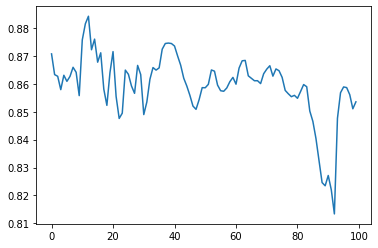

In [ ]:
# get the coefficient of determination across all predictions made compared to true values 
# we are looking at 100 predictions made for one batch of inputs and thus compared to one batch of outputs 

from sklearn.metrics import r2_score

r2_scores = []

i = 0
for y_pred in mc_predictions:
  score = r2_score(y_test_multi[i], y_pred[i])
  r2_scores.append(score)
  i+=1

x = [i for i in range(100)]

print('100 scores for predicted vs true values:\n {}'.format(np.array(r2_scores)))
print(np.array(r2_scores).mean())
plt.plot(x, r2_scores)
plt.show()


100 MSE scores for predicted vs true values:
 [0.11787465 0.12543806 0.12647074 0.13111079 0.13091357 0.13202088
 0.12943346 0.12764086 0.12863321 0.13605596 0.11911966 0.11561779
 0.11285157 0.12432245 0.12028226 0.13036392 0.12406196 0.13325886
 0.13338787 0.11450223 0.10371526 0.11902097 0.12587928 0.12249038
 0.10672942 0.10724443 0.11075637 0.11215814 0.10418772 0.10678649
 0.11812048 0.11446552 0.10801611 0.1046199  0.10511384 0.10443795
 0.09921818 0.09765502 0.09753739 0.09766622 0.09836512 0.1011217
 0.10371354 0.10735267 0.10954463 0.11213911 0.11513408 0.11604929
 0.11334468 0.10999188 0.1100163  0.10906412 0.10504871 0.1053856
 0.10927384 0.11084804 0.11100402 0.1100781  0.10832179 0.10712232
 0.10902392 0.10451764 0.10248999 0.10238303 0.10668746 0.10737986
 0.10806325 0.10805122 0.10885635 0.106098   0.10481976 0.10386228
 0.10677864 0.10476143 0.10526704 0.10711206 0.11075576 0.11168877
 0.11251249 0.11214085 0.11296382 0.1110656  0.10912847 0.10977512
 0.11669219 0.1196

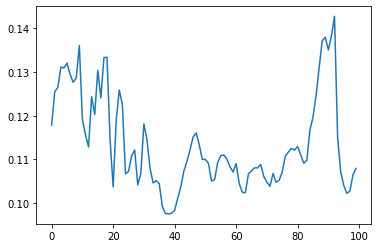

In [ ]:
# get the MSE score across all predictions made compared to true values 
# we are looking at 100 predictions made for one batch of inputs and thus compared to one batch of outputs 

from sklearn.metrics import mean_squared_error

mse_scores = []

i = 0
for y_pred in mc_predictions:
  score = mean_squared_error(y_test_multi[i], y_pred[i])
  mse_scores.append(score)
  i+=1

x = [i for i in range(100)]

print('100 MSE scores for predicted vs true values:\n {}'.format(np.array(mse_scores)))
print(np.array(mse_scores).mean())
plt.plot(x, mse_scores)
plt.show()


100 MSE scores for predicted vs true values:
 [0.21387687 0.2202341  0.22137644 0.2291077  0.22865411 0.23315428
 0.23251352 0.23442521 0.24652693 0.25750701 0.2246391  0.22016766
 0.21871947 0.2412459  0.22634283 0.23323026 0.22899152 0.22911587
 0.22444761 0.22387065 0.21341442 0.23328842 0.25234665 0.24101444
 0.2152347  0.21504318 0.22160366 0.22491605 0.20165911 0.20710221
 0.21992778 0.21885223 0.21686183 0.21522612 0.2134577  0.21024268
 0.20882659 0.20845171 0.20688471 0.20620355 0.20712073 0.21013059
 0.21378076 0.21558606 0.21632003 0.22056034 0.22533887 0.22422814
 0.21787111 0.21699562 0.21947412 0.21836825 0.21498105 0.21923303
 0.22419237 0.22428172 0.22281342 0.22126445 0.21966238 0.21608291
 0.21468699 0.21411611 0.21449198 0.21389175 0.21539102 0.21738792
 0.21838501 0.21697531 0.21575634 0.21372874 0.21301566 0.2114535
 0.21114823 0.21554891 0.22333228 0.22647304 0.22685491 0.23302392
 0.23663655 0.23469835 0.23189737 0.22909648 0.22492592 0.22051752
 0.21905493 0.218

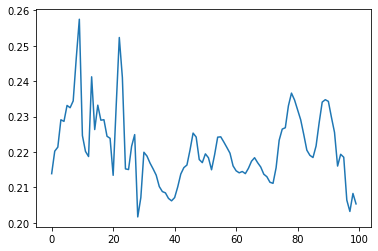

In [ ]:
# get the MAE score across all predictions made compared to true values 
# we are looking at 100 predictions made for one batch of inputs and thus compared to one batch of outputs 

from sklearn.metrics import mean_absolute_error

mae_scores = []

i = 0
for y_pred in mc_predictions:
  score = mean_absolute_error(y_test_multi[i], y_pred[i])
  mae_scores.append(score)
  i+=1

x = [i for i in range(100)]

print('100 MSE scores for predicted vs true values:\n {}'.format(np.array(mae_scores)))
print(np.array(mae_scores).mean())
plt.plot(x, mae_scores)
plt.show()


100 RMSE scores for predicted vs true values:
 [0.34332878 0.35417236 0.35562725 0.36209224 0.3618198  0.36334677
 0.35976862 0.3572686  0.35865472 0.36885765 0.34513716 0.34002616
 0.33593388 0.35259389 0.34681733 0.36105944 0.35222431 0.36504638
 0.36522305 0.33838178 0.32204854 0.34499416 0.3547947  0.34998625
 0.32669469 0.32748195 0.33280079 0.3349002  0.32278123 0.32678202
 0.3436866  0.33832753 0.32865805 0.32345    0.32421264 0.32316862
 0.31498917 0.31249803 0.31230976 0.31251595 0.31363214 0.31799639
 0.32204587 0.32764717 0.33097526 0.33487178 0.33931413 0.34066008
 0.33666702 0.33165023 0.33168705 0.33024857 0.32411219 0.32463149
 0.33056595 0.3329385  0.33317265 0.33178019 0.32912276 0.32729547
 0.33018771 0.32329188 0.32014058 0.31997349 0.32663047 0.32768867
 0.32872976 0.32871145 0.32993385 0.32572688 0.3237588  0.32227671
 0.32677    0.32366871 0.32444883 0.3272798  0.33279989 0.3341987
 0.33542882 0.33487438 0.33610091 0.33326506 0.33034598 0.33132328
 0.34160239 0.34

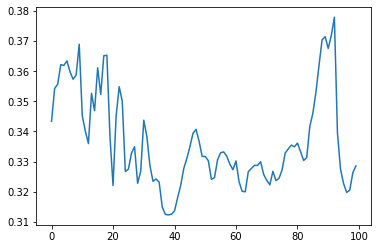

In [ ]:
# get the RMSE score across all predictions made compared to true values 
# we are looking at 100 predictions made for one batch of inputs and thus compared to one batch of outputs 

from sklearn.metrics import mean_squared_error

rmse_scores = []

i = 0
for y_pred in mc_predictions:
  score = mean_squared_error(y_test_multi[i], y_pred[i], squared=False)
  rmse_scores.append(score)
  i+=1

x = [i for i in range(100)]

print('100 RMSE scores for predicted vs true values:\n {}'.format(np.array(rmse_scores)))
print(np.array(rmse_scores).mean())
plt.plot(x, rmse_scores)
plt.show()


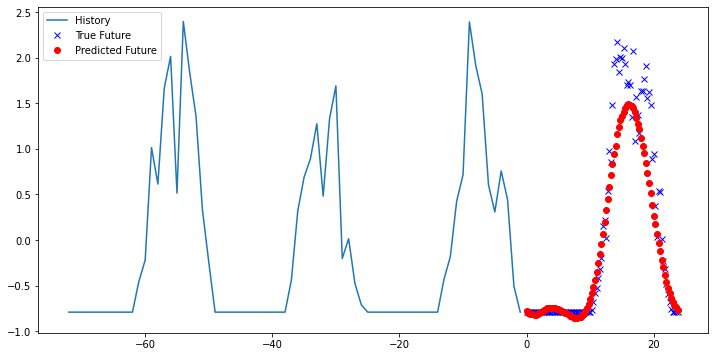

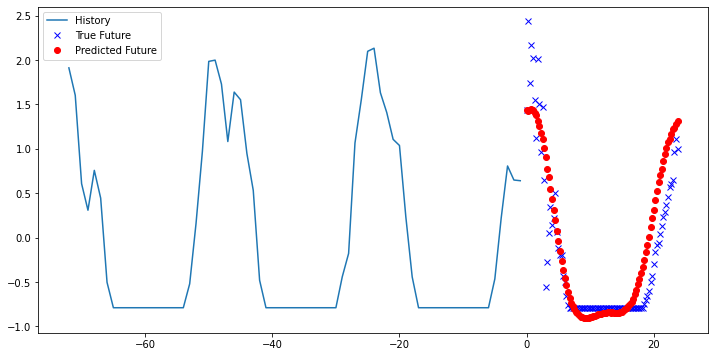

In [ ]:
for x, y in val_data_multi.take(2):
  multi_step_plot(x[0], y[0], multi_step_solar_model.predict(x)[0])

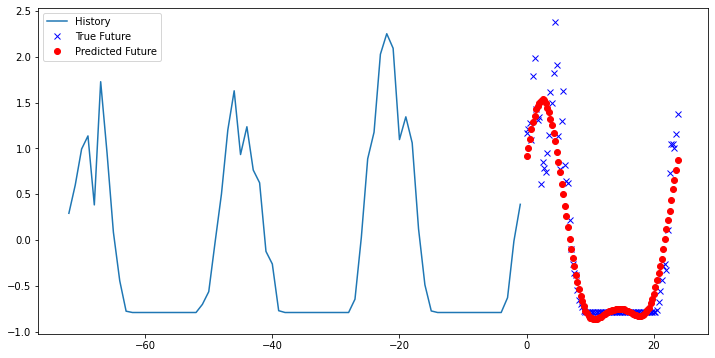

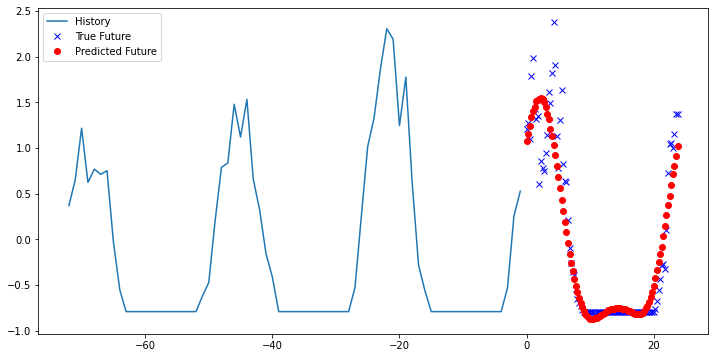

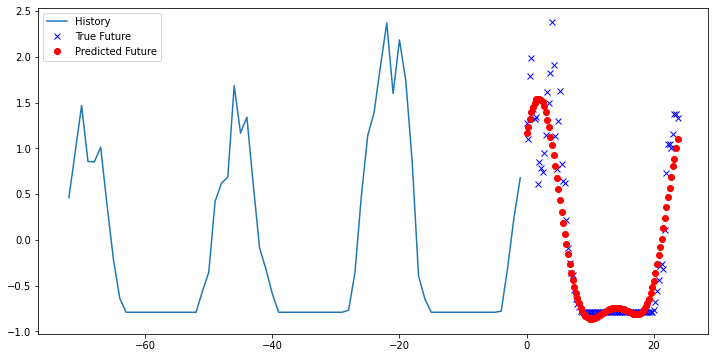

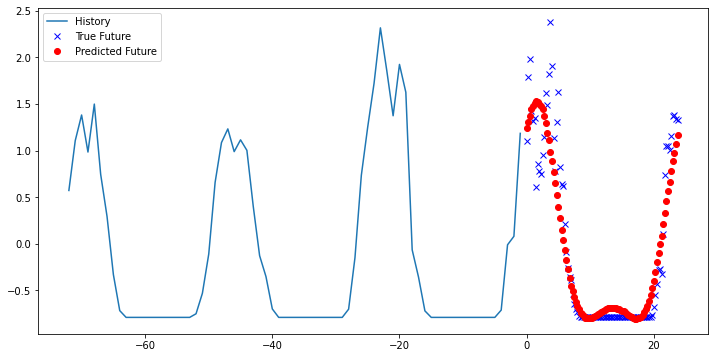

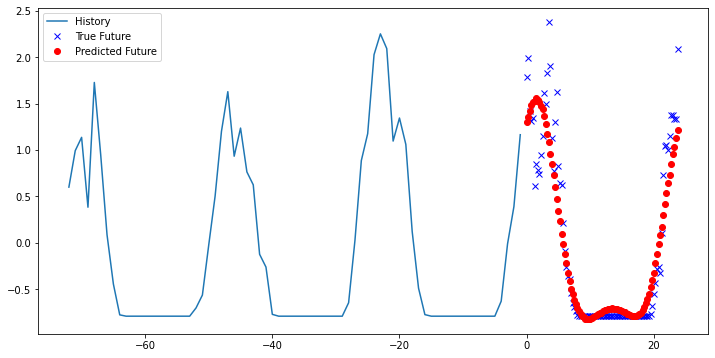

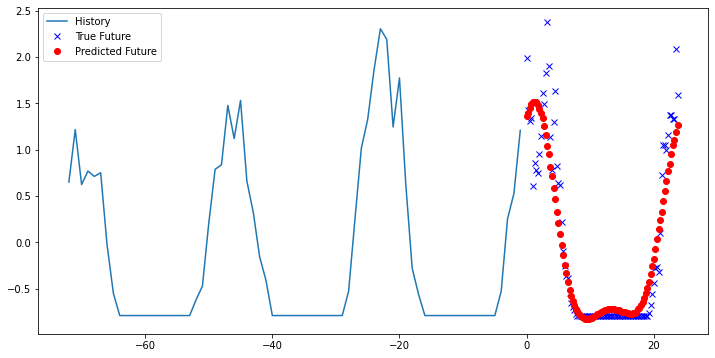

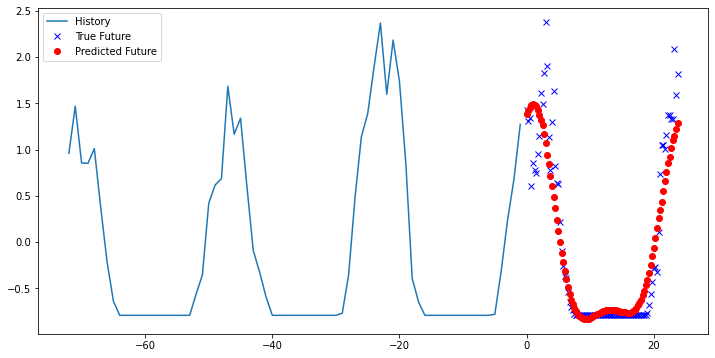

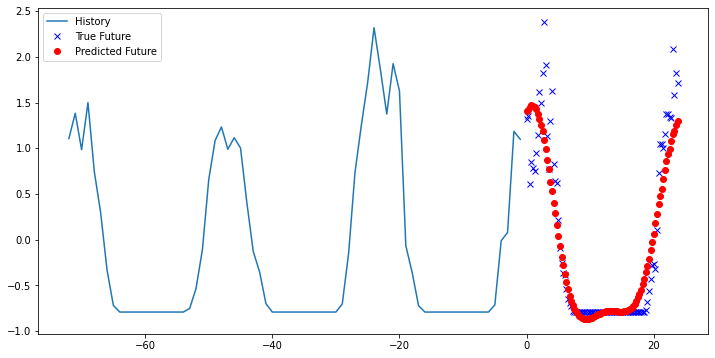

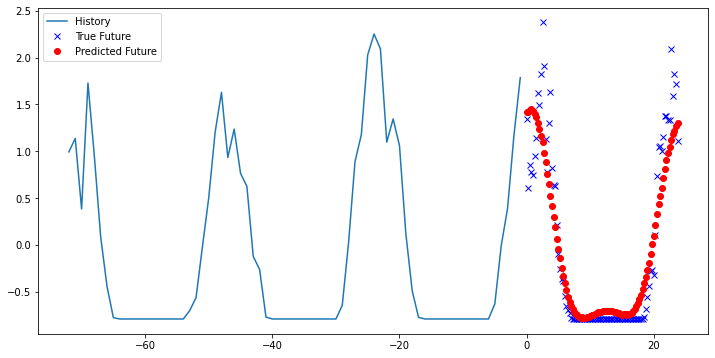

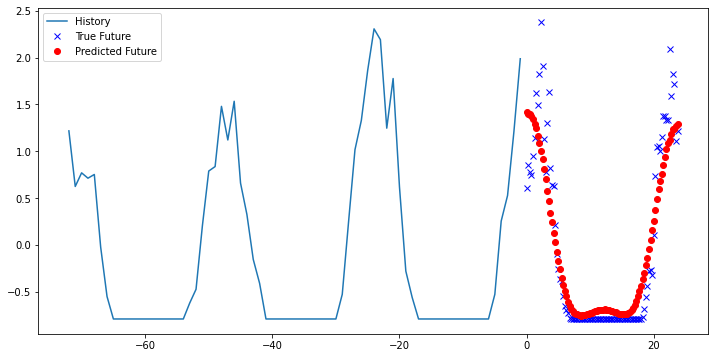

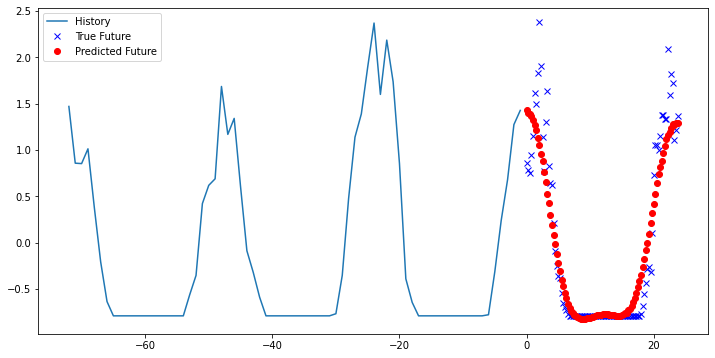

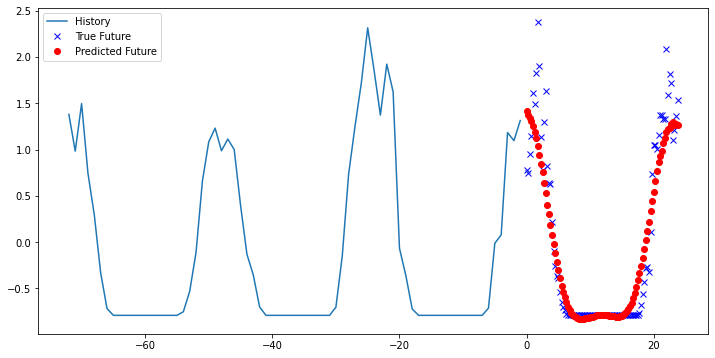

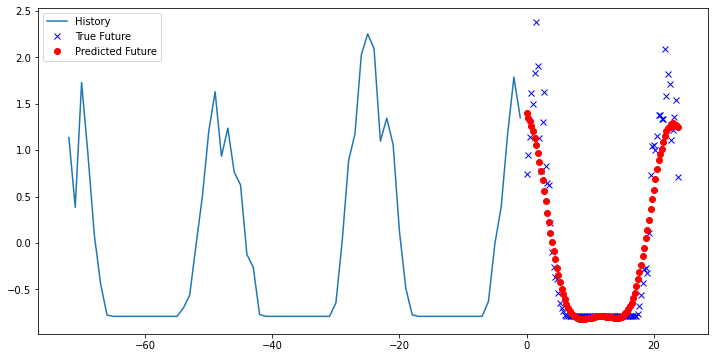

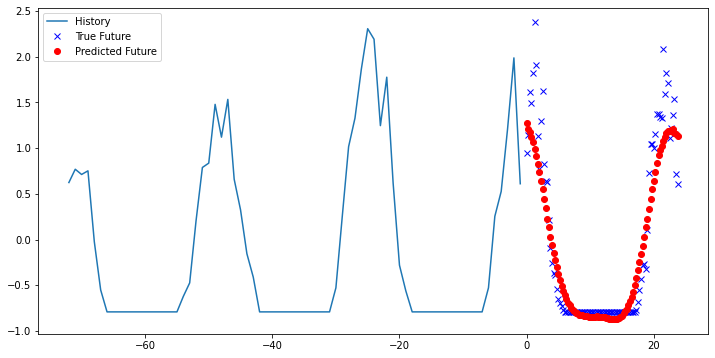

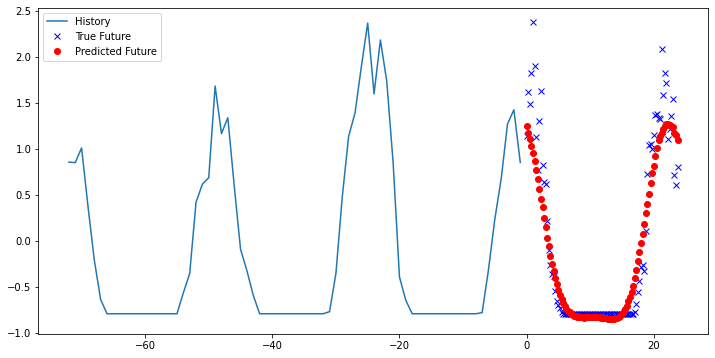

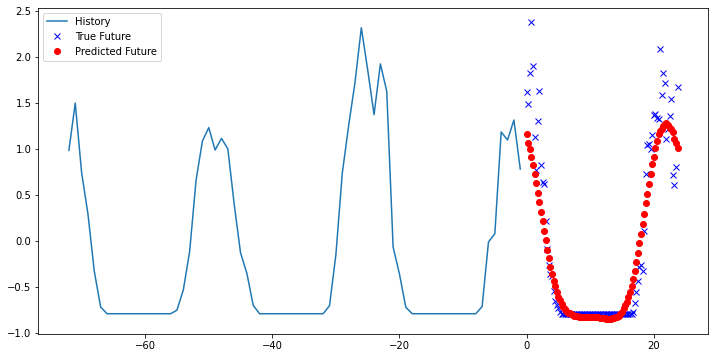

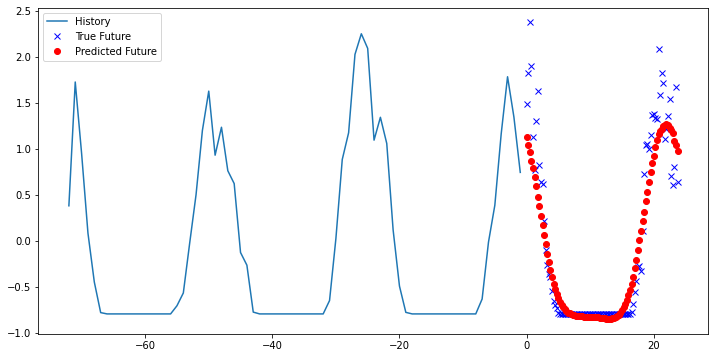

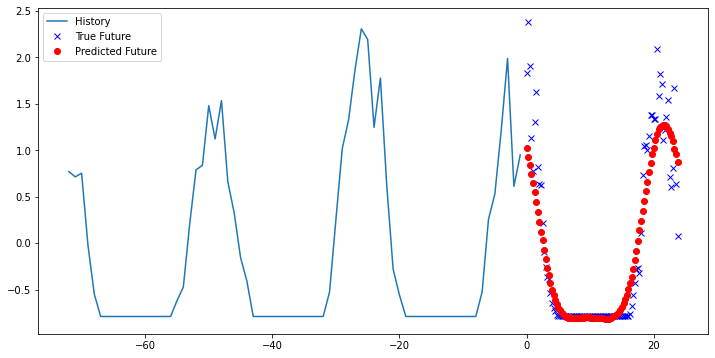

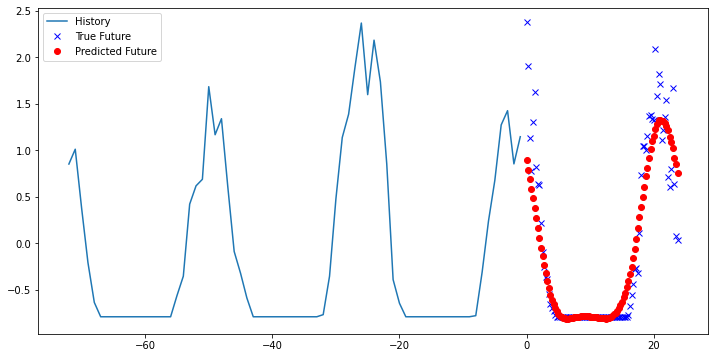

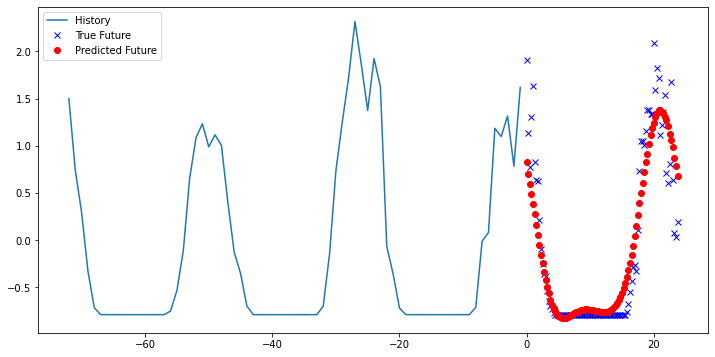

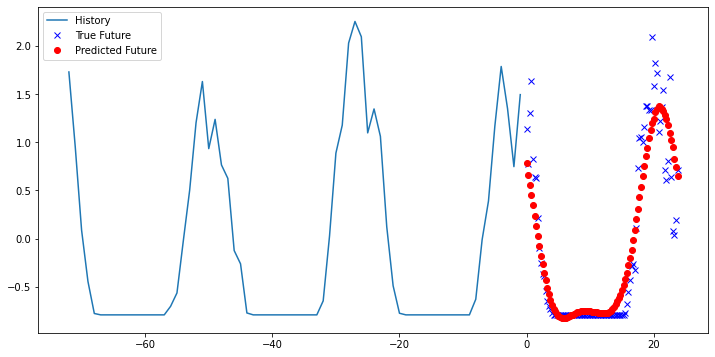

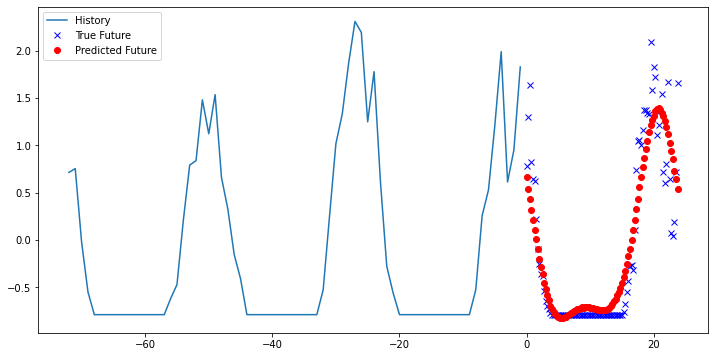

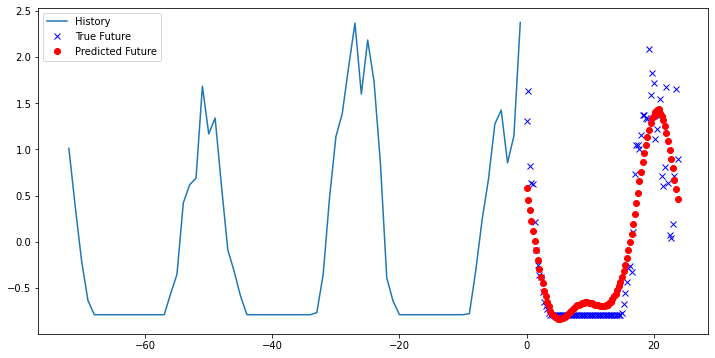

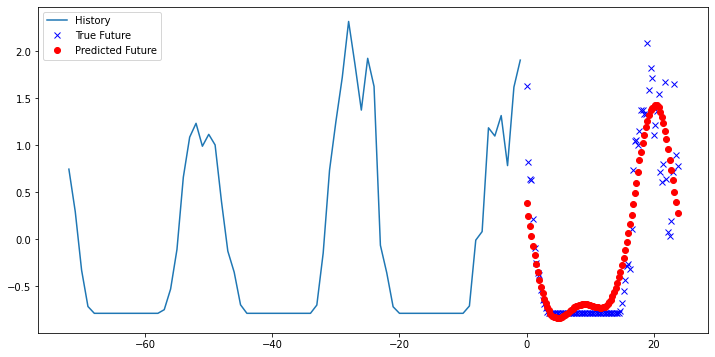

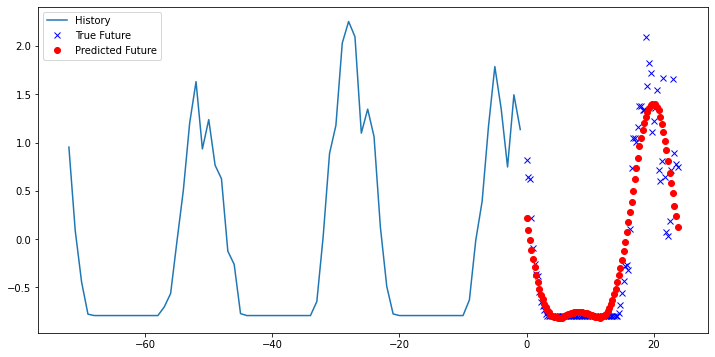

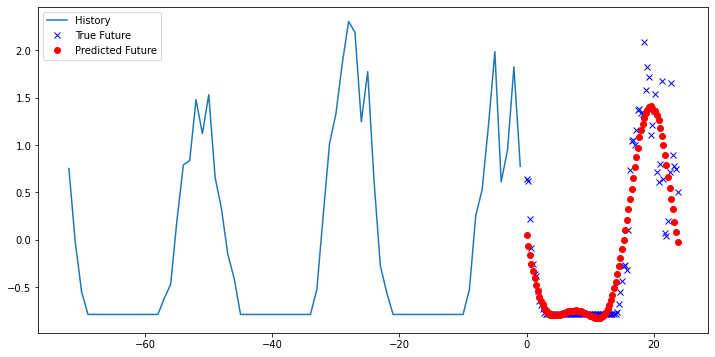

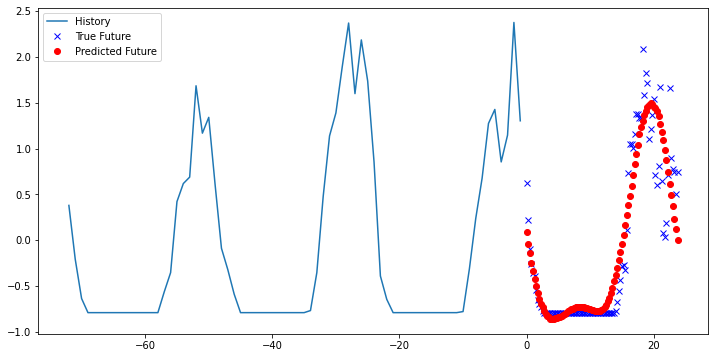

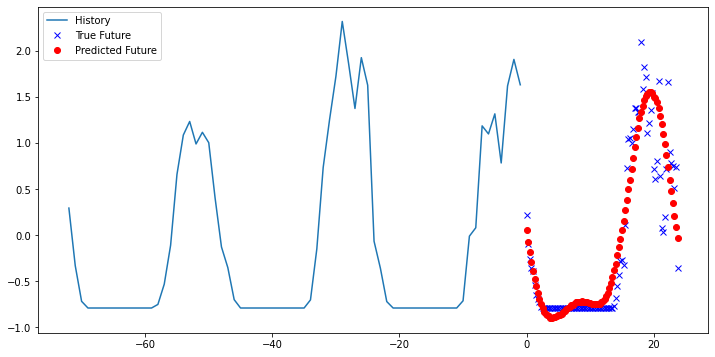

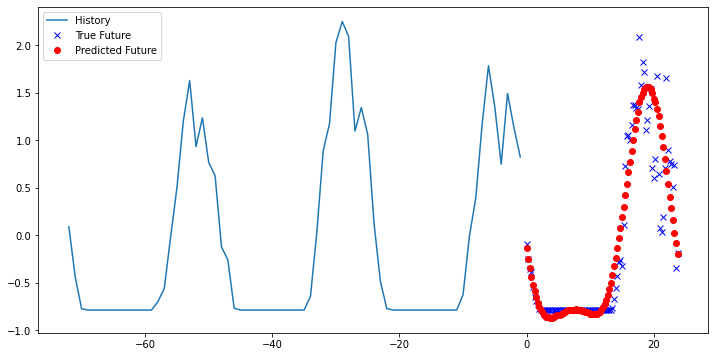

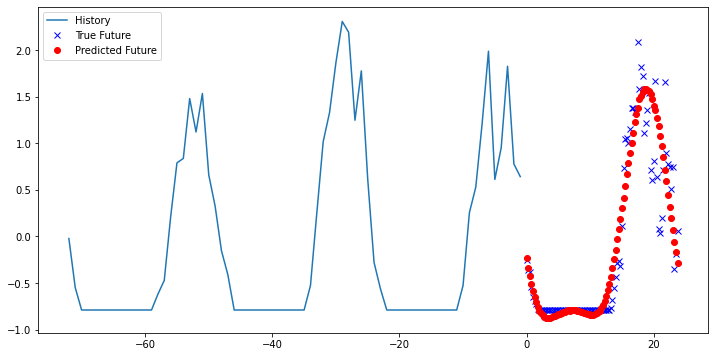

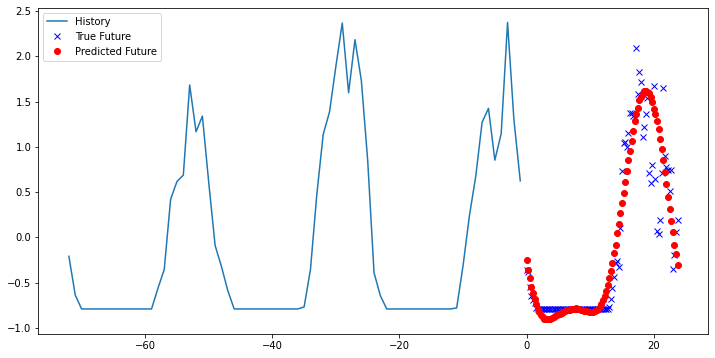

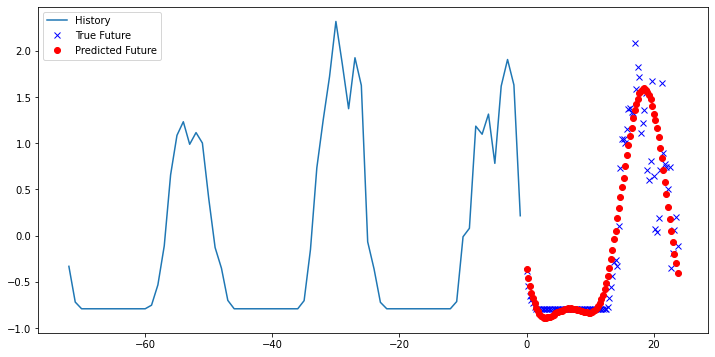

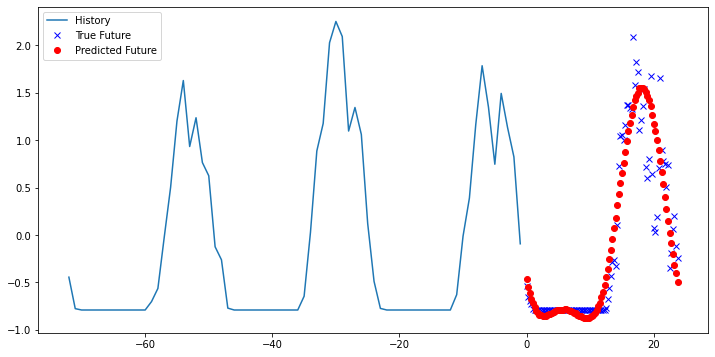

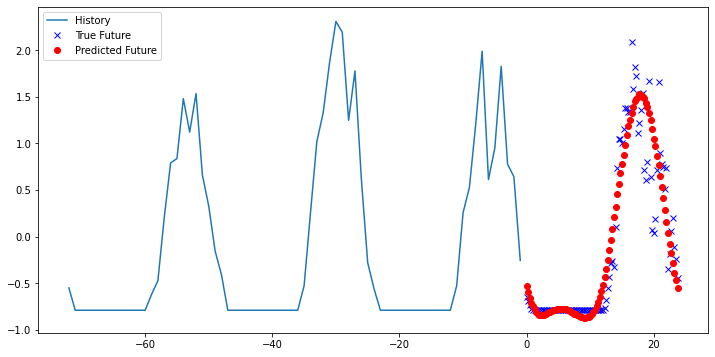

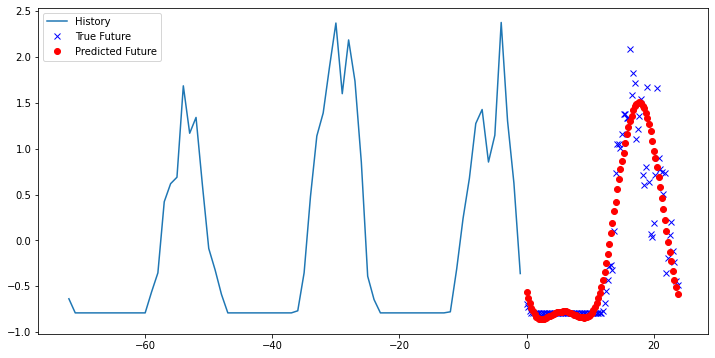

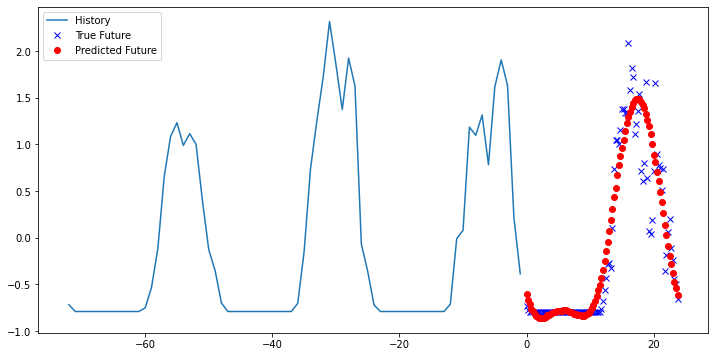

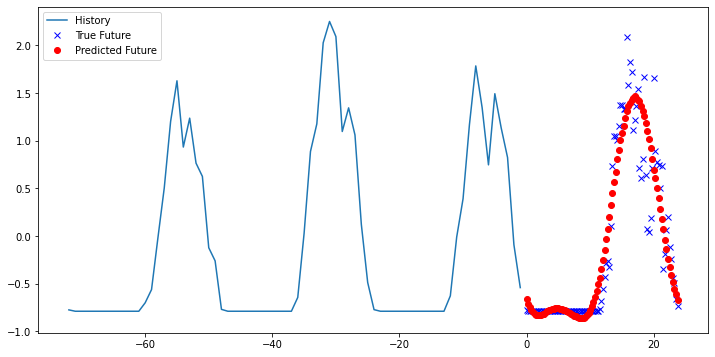

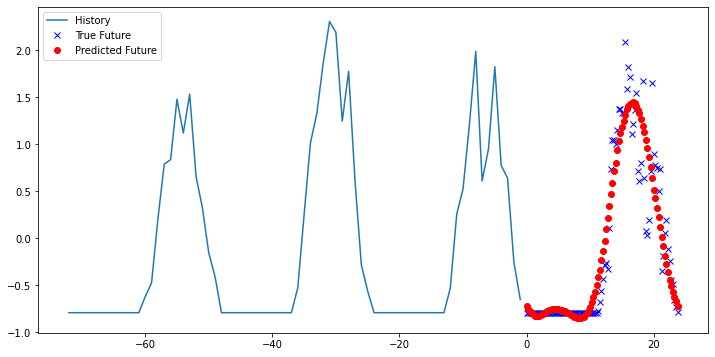

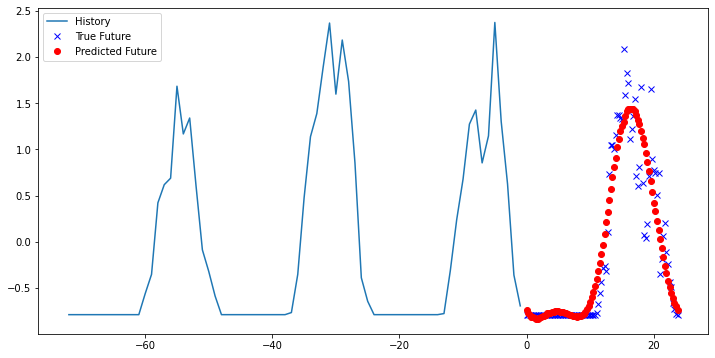

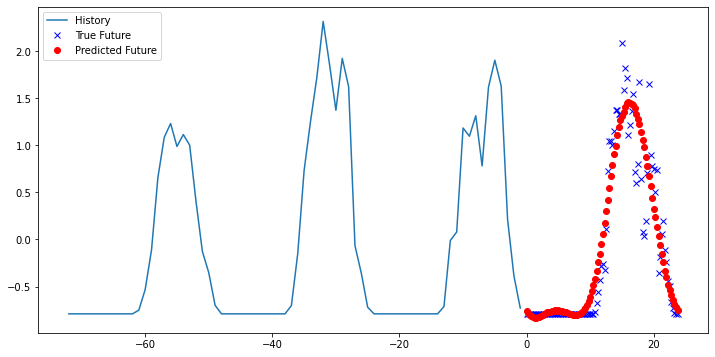

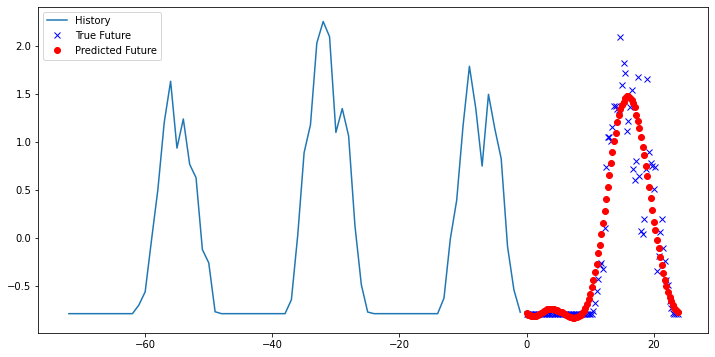

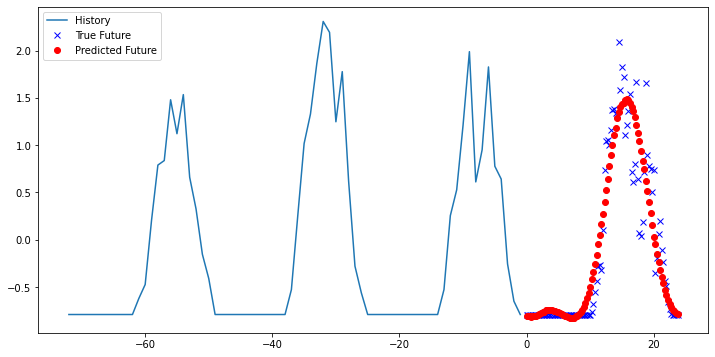

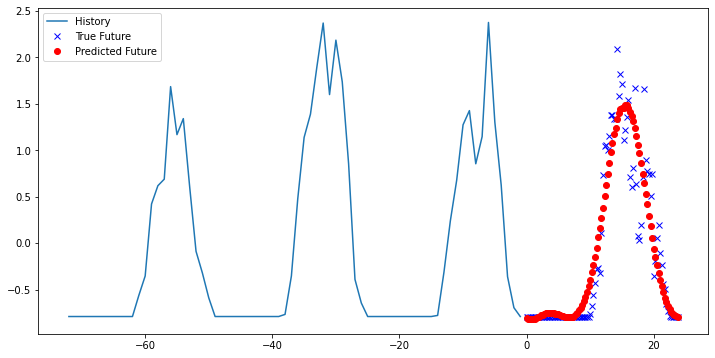

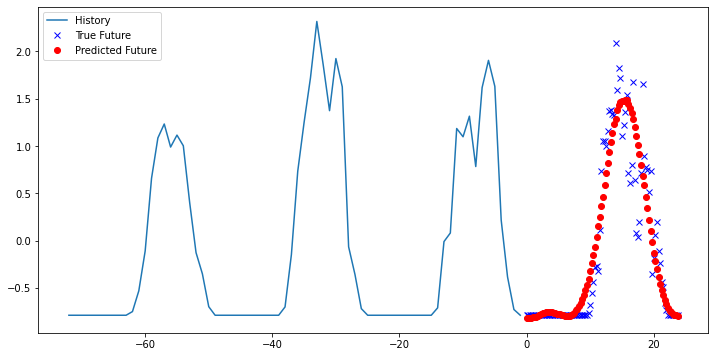

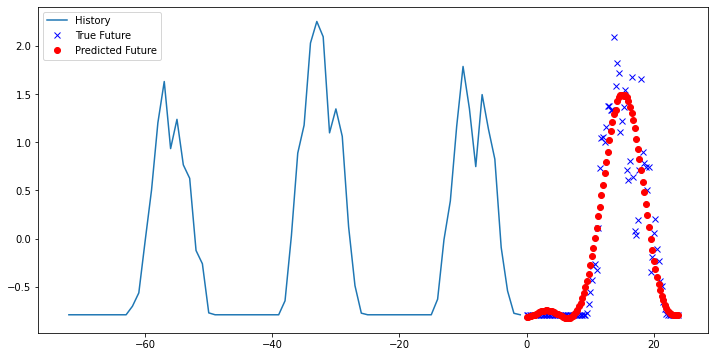

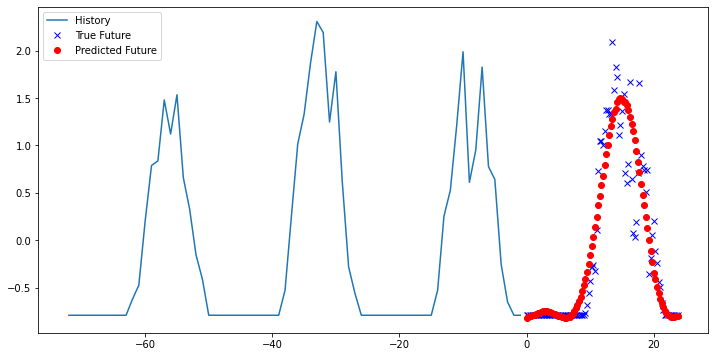

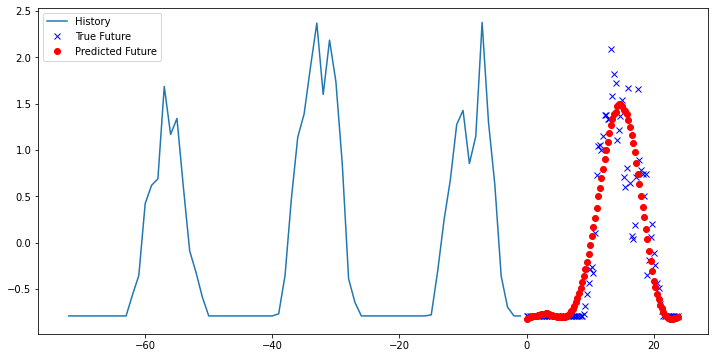

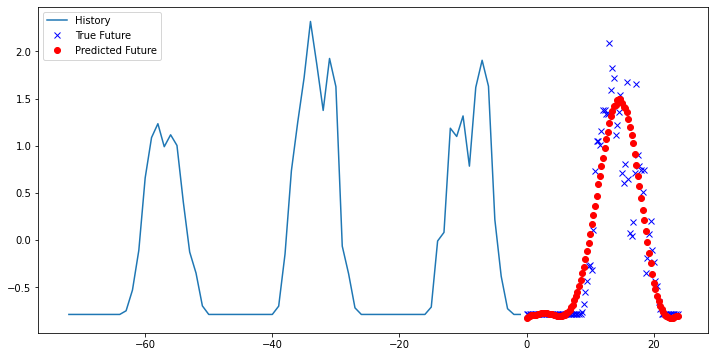

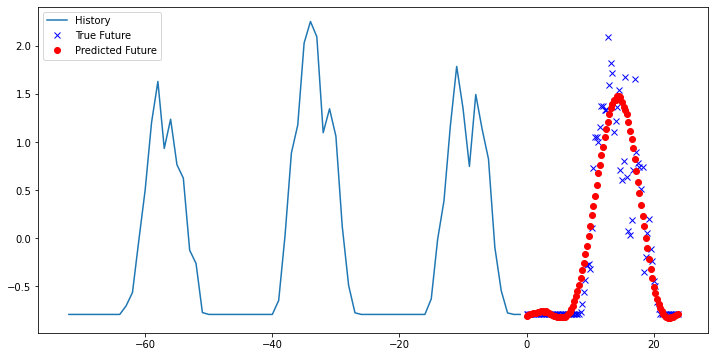

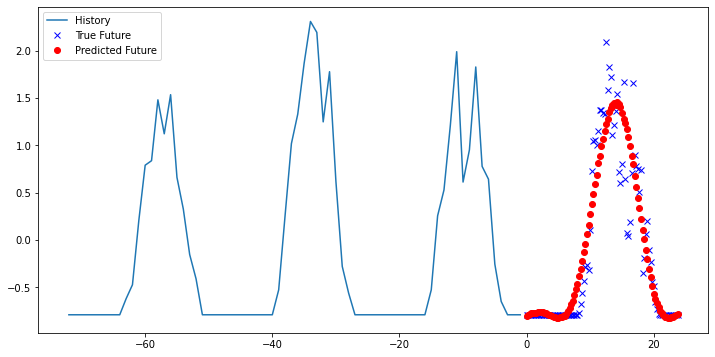

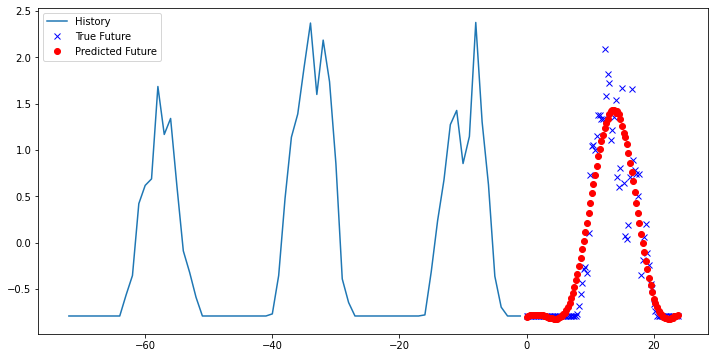

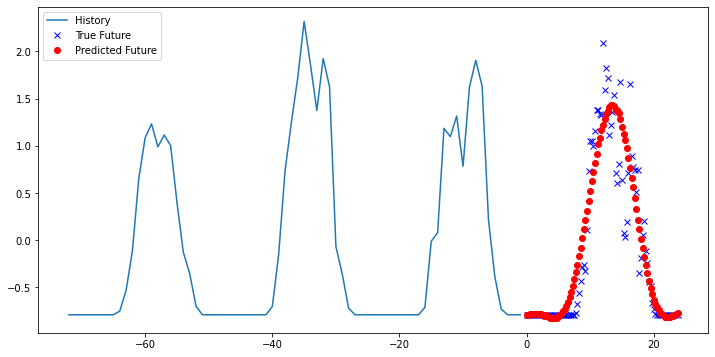

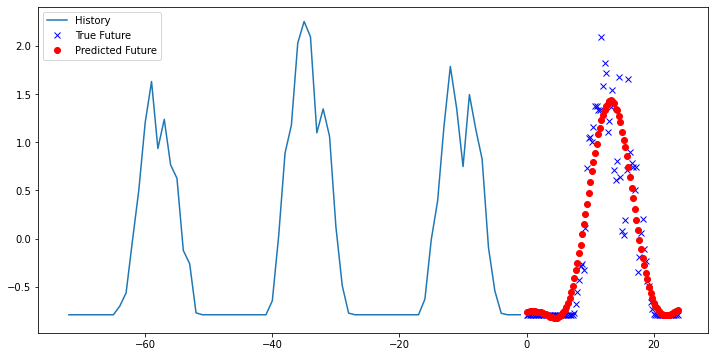

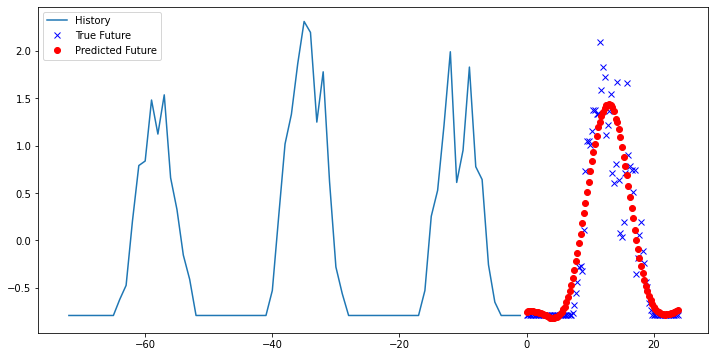

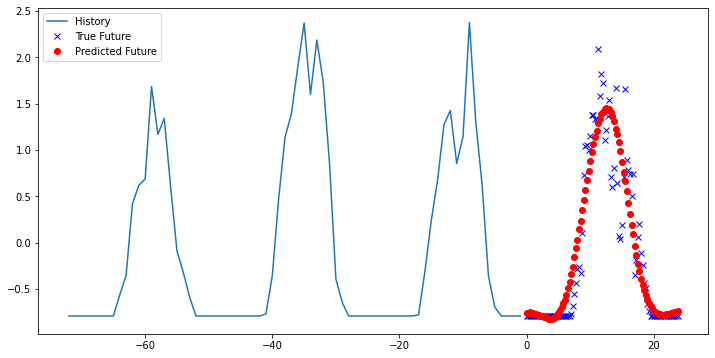

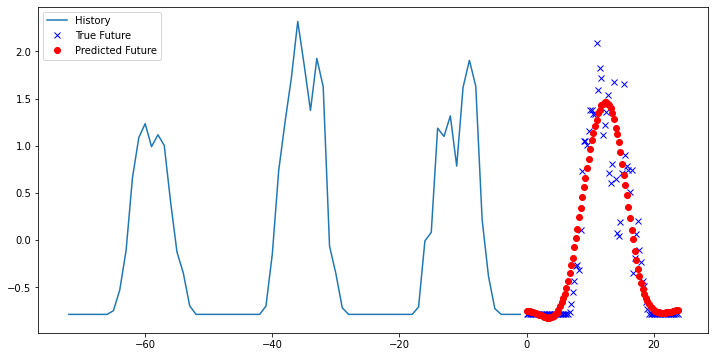

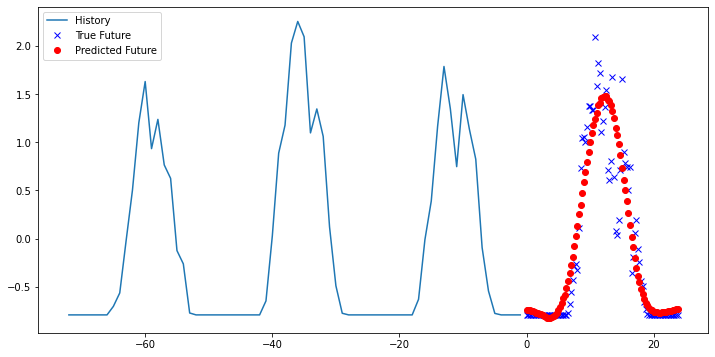

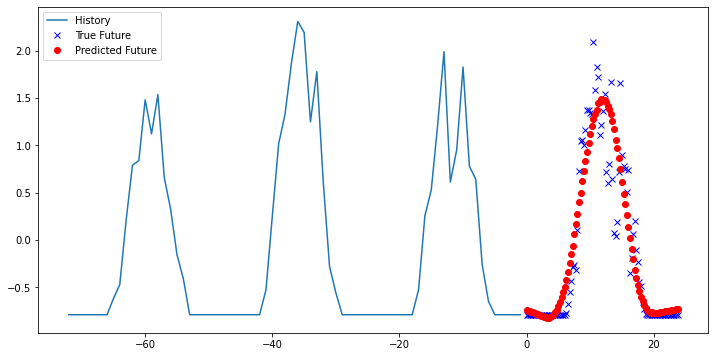

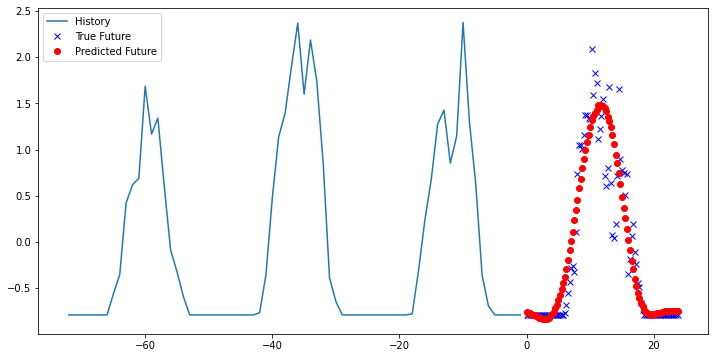

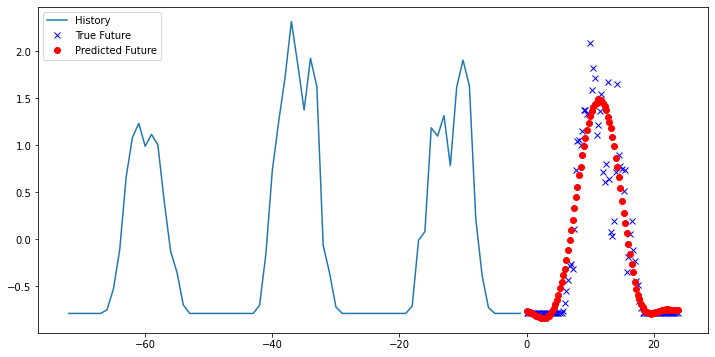

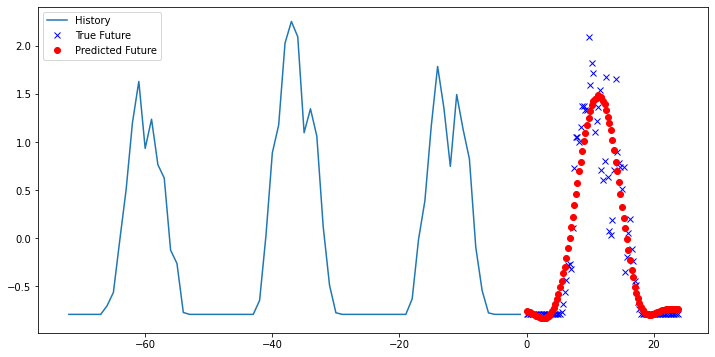

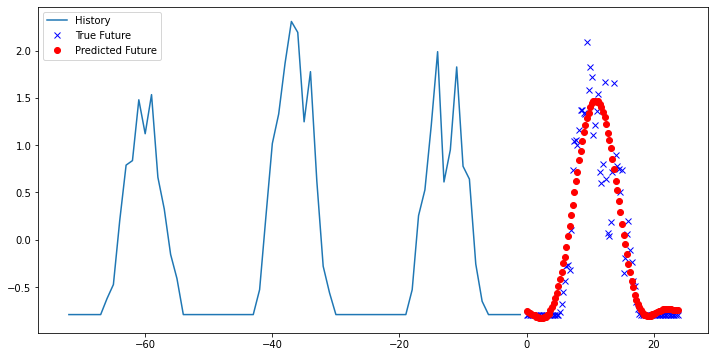

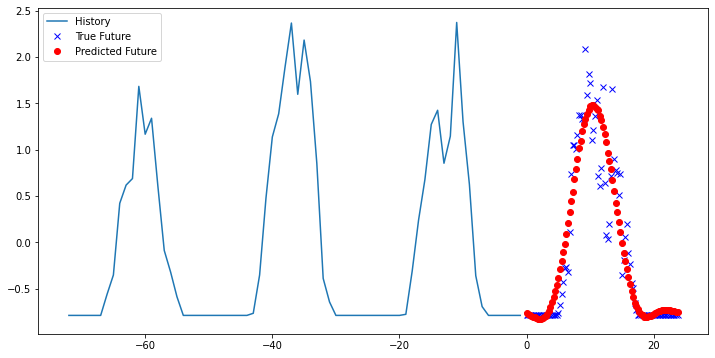

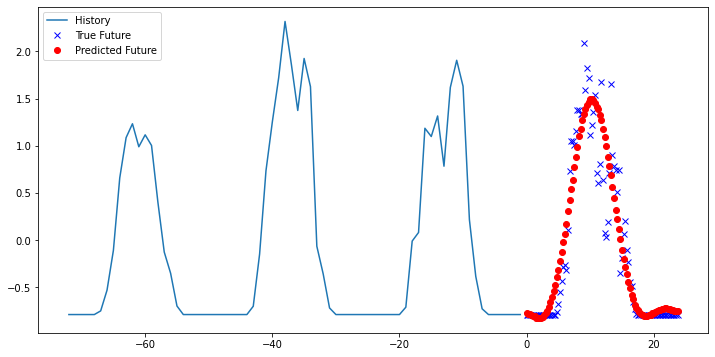

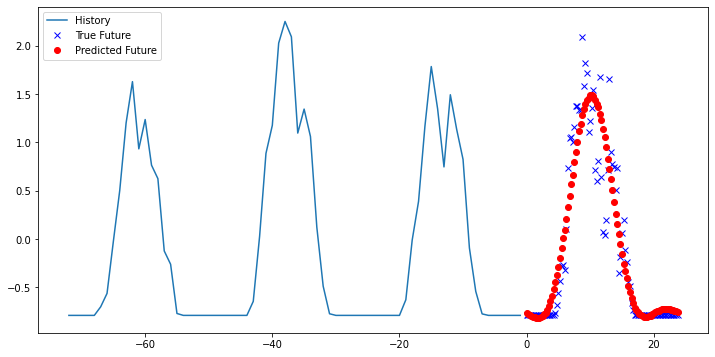

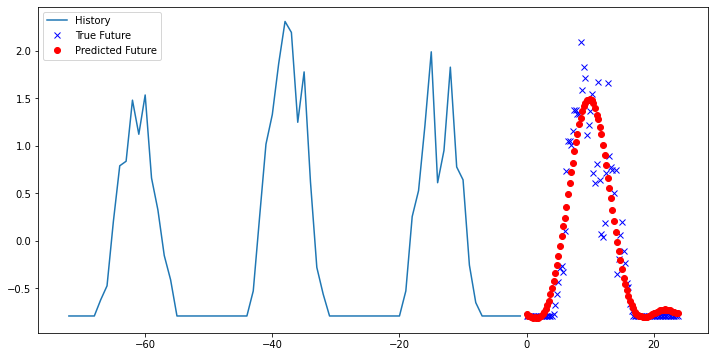

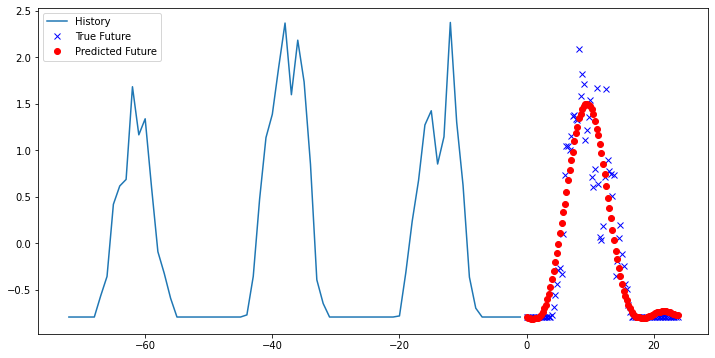

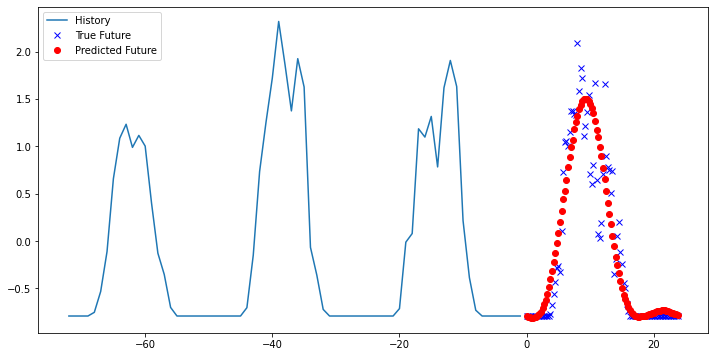

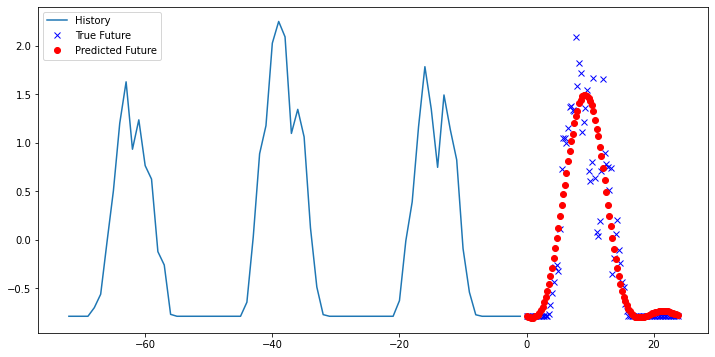

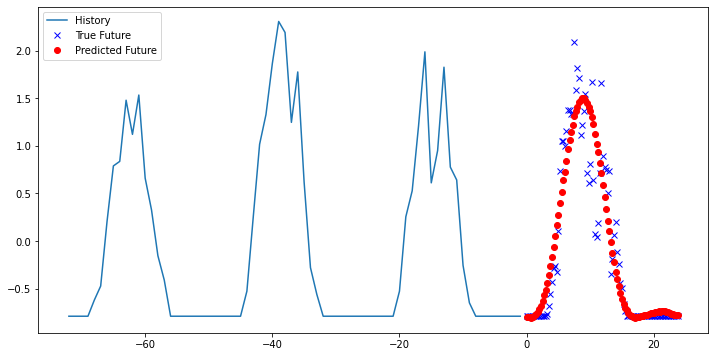

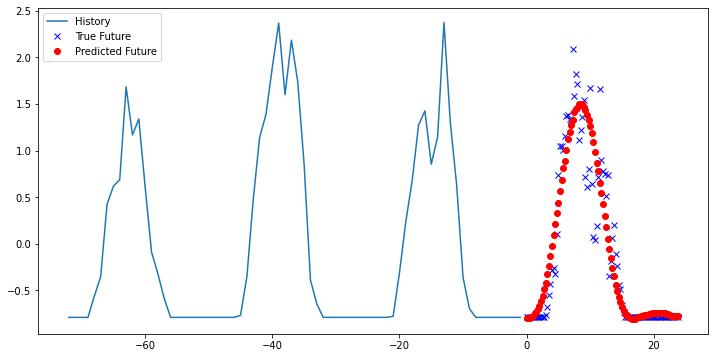

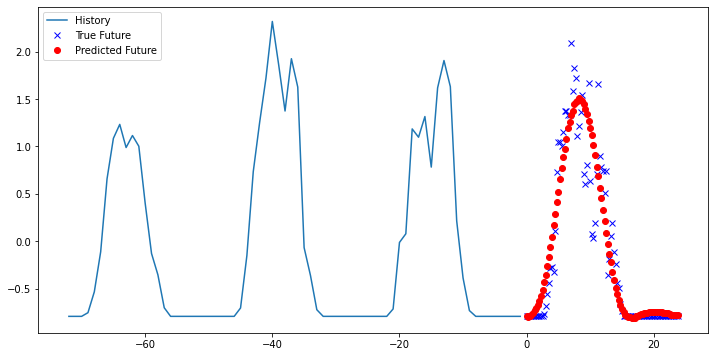

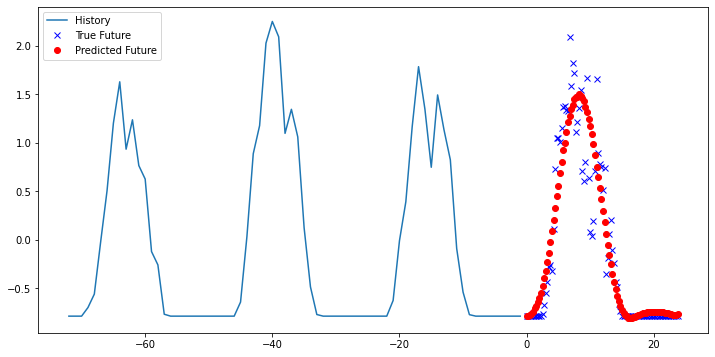

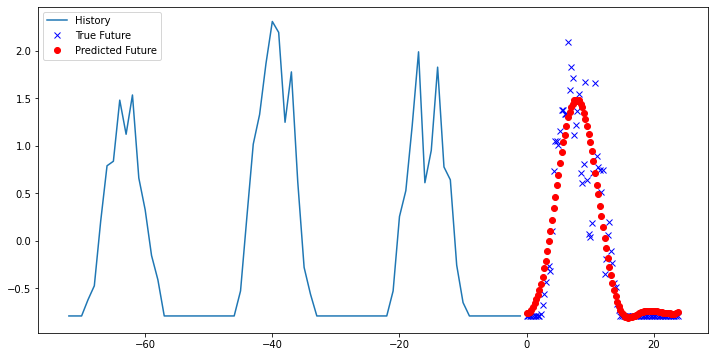

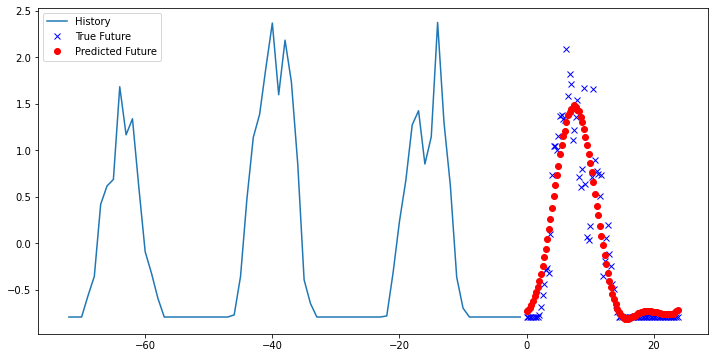

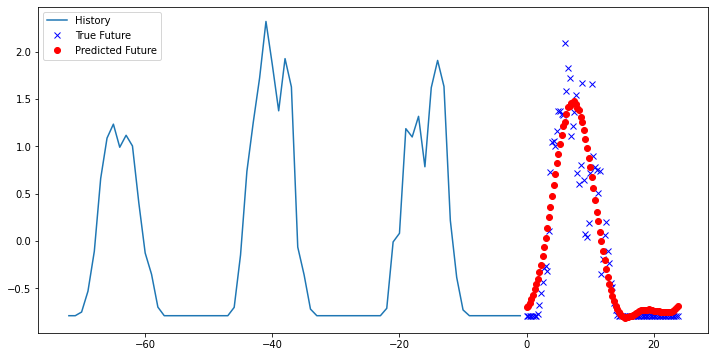

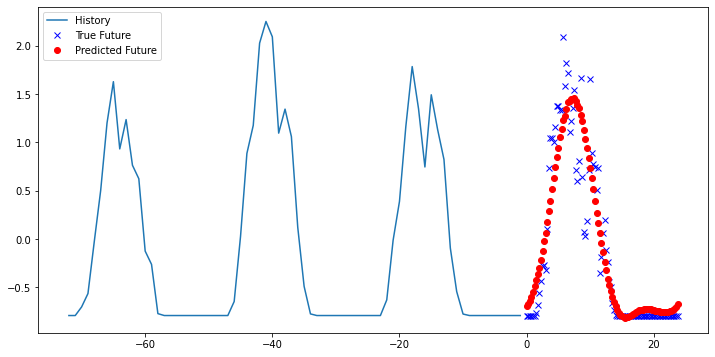

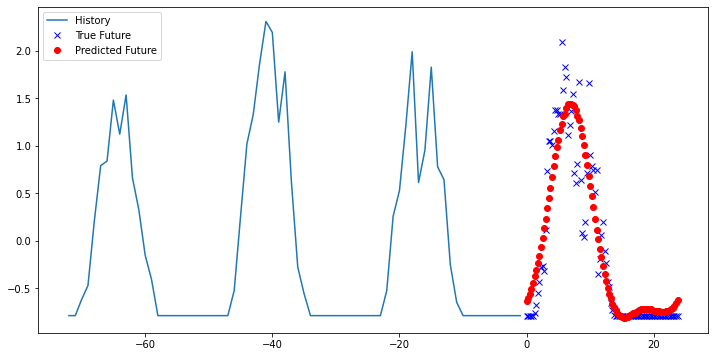

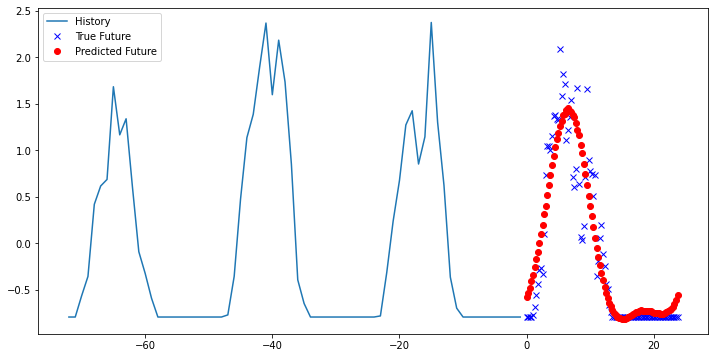

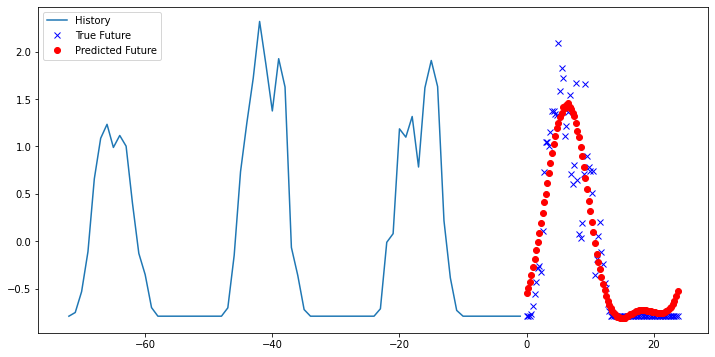

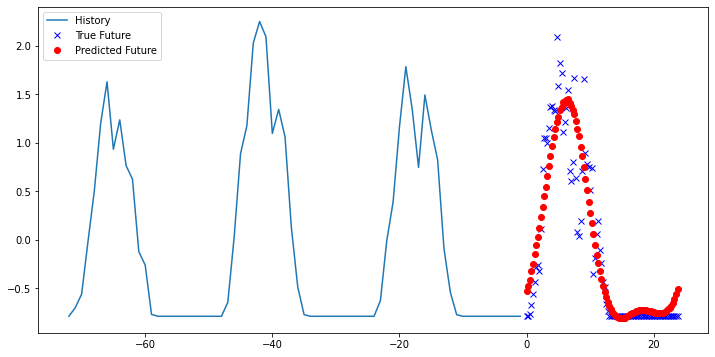

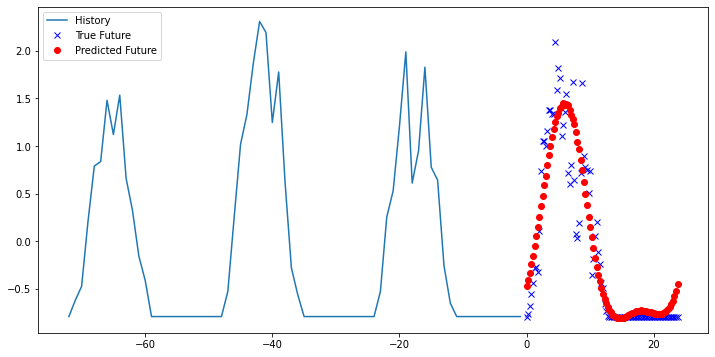

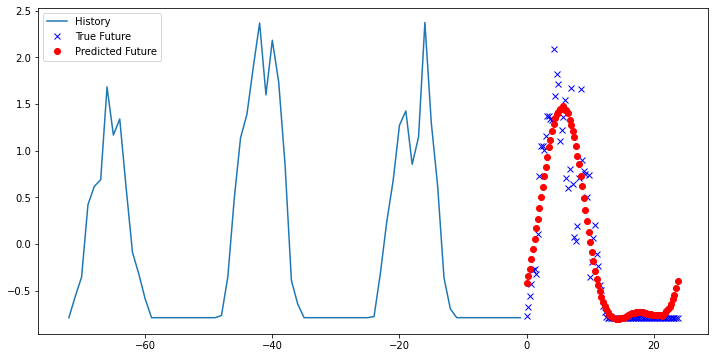

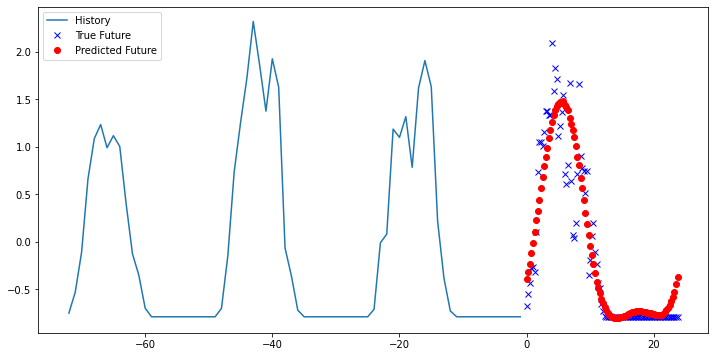

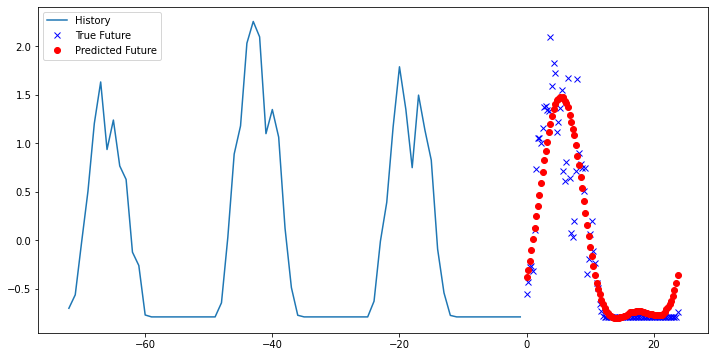

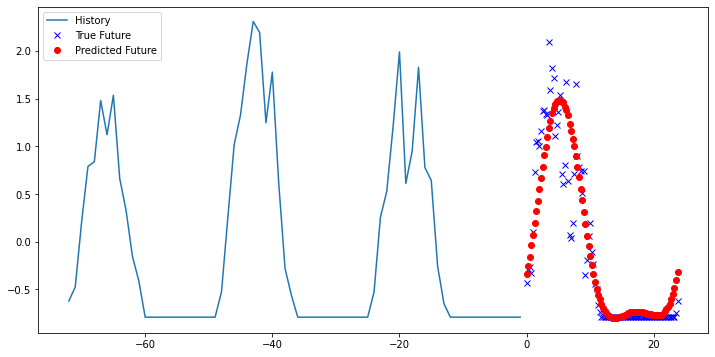

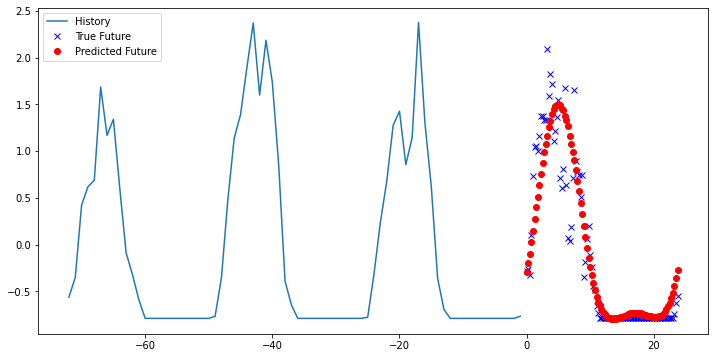

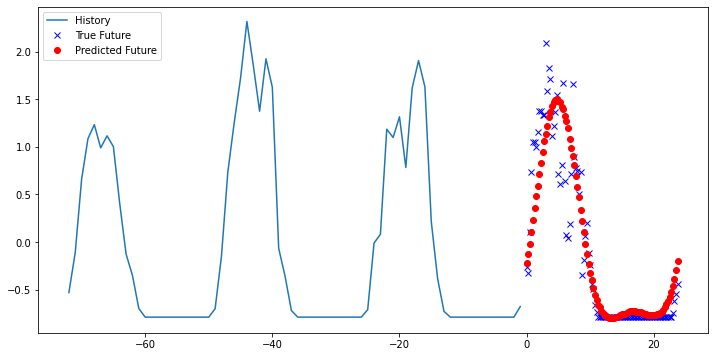

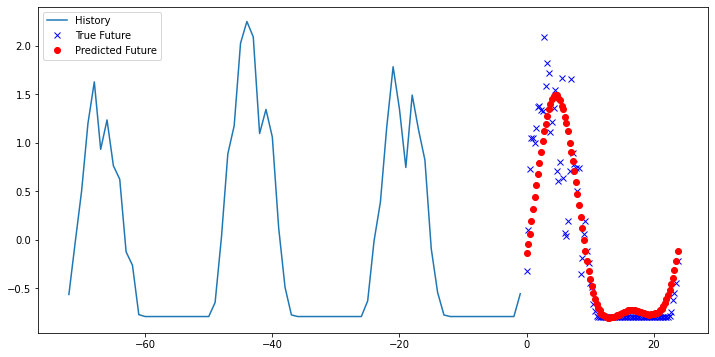

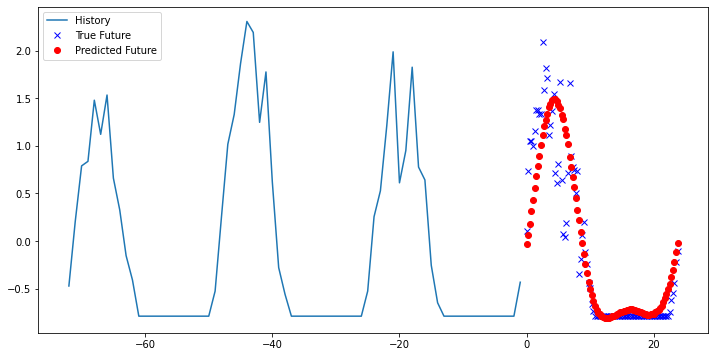

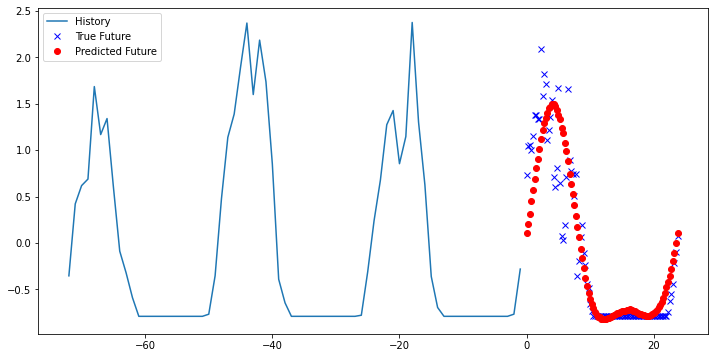

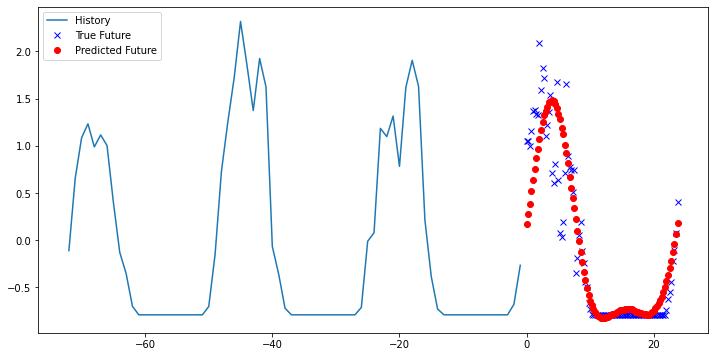

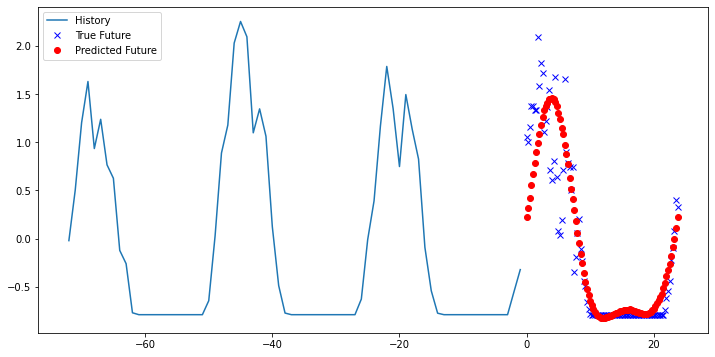

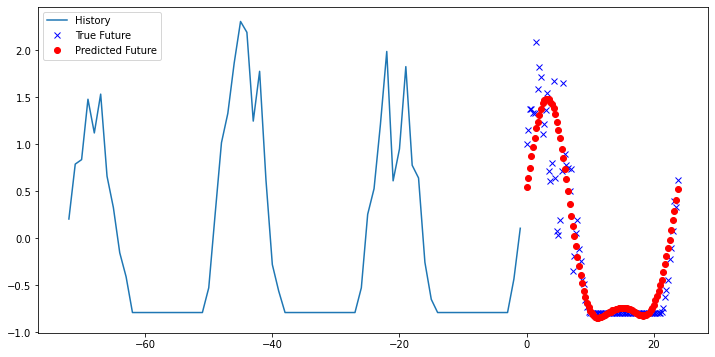

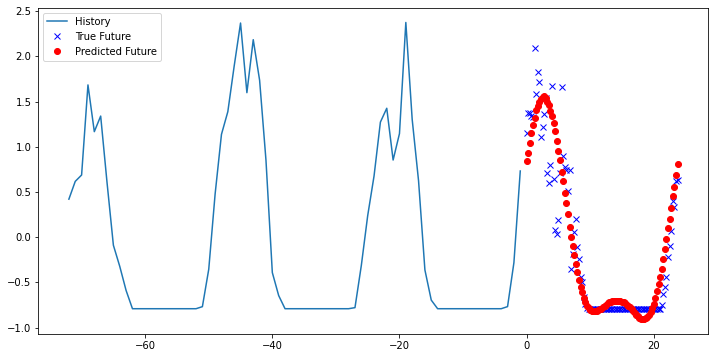

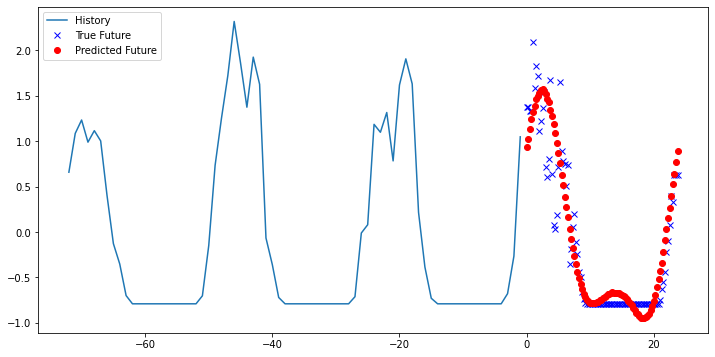

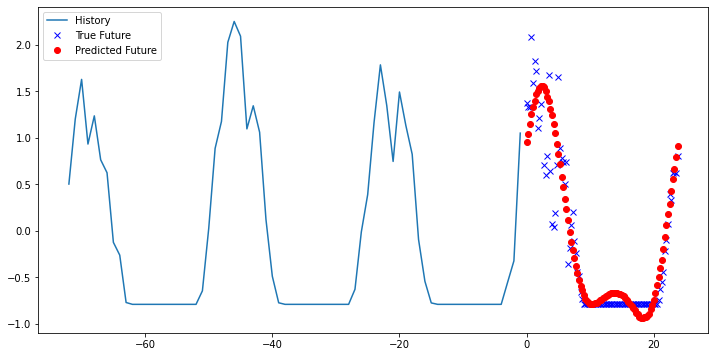

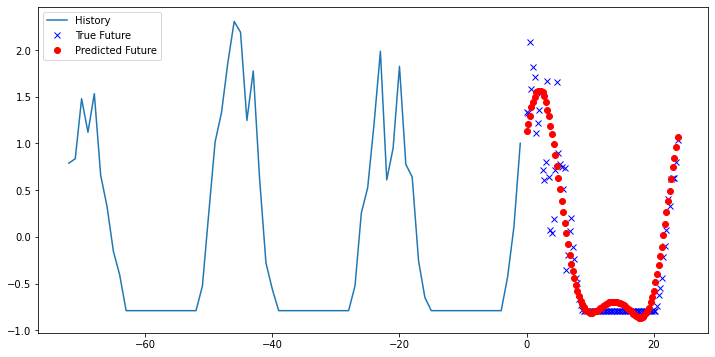

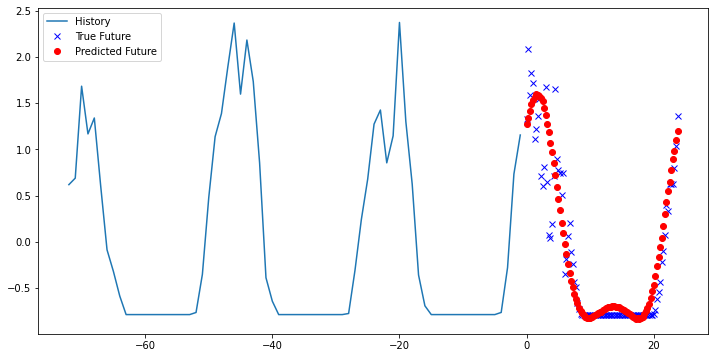

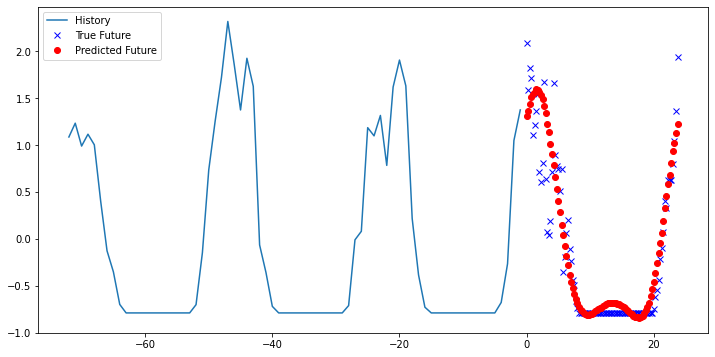

In [ ]:
# plot the 100 predictions generated to the test input and labels generated in preprocessing
# this will offer a comparison of the true future and the predicted future generated by the model

i = 0
for y_pred in mc_predictions:
  multi_step_plot(x_test_multi[i], y_test_multi[i], y_pred[i])
  i+=1